# Financial Inclusion and Economic Activity in Colombia: Analysis of DANE Microdata


## **Executive Summary**

This notebook provides a comprehensive analysis of financial inclusion, income sources, and expenditures across the Colombian population, based on the DANE survey dataset.

The analysis includes:

- Usage of financial products by region, gender, and area type (urban/rural)

- Overall financial exclusion rates

- Income source reach and average contributions

- Unemployment rates by region

- Household spending patterns, including how many people pay and how much on average

The aim is to identify key trends in financial behavior and economic vulnerability, guiding targeted policy or program design.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('DANE_data.csv')

In [3]:
# Define conversion rate
COP_TO_USD = 0.000241

# Columns to convert 
monetary_cols = [
    'total_labor_income', 'main_job_gross_income', 'overtime_income_amount',
    'food_as_pay_value', 'housing_as_pay_value', 'company_transport_value',
    'other_in_kind_income_value', 'withholding_tax_amount', 'secondary_job_income',
    'Income amount last month', 'Earned income last month',
    'Amount received for rentals (last month)', 'Amount received from pensions or retirement (last month)',
    'Amount received as alimony (last month)', 'Amount received from households in country (last 12 months)',
    'Amount received from households abroad (last 12 months)', 'Amount received from institutions in country (last 12 months)',
    'Amount from national private entities (last 12 months)', 'Amount from government entities (last 12 months)',
    'Amount from More Families in Action (last 12 months)', 'Amount from Youth in Action (last 12 months)',
    'Amount from Colombia Mayor (last 12 months)', 'Amount from other programs (last 12 months)',
    'Amount from entities outside the country (last 12 months)', 'Amount received from investments (last 12 months)',
    'Amount received from severance pay or interest (last 12 months)', 'Amount received from other sources (last 12 months)',
    'Monthly amortization fee', 'Actual monthly rent payment', 'Monthly health payment (COP)',
    'Amount paid in property tax (last 12 months)', 'Amount paid in capital gains tax (last 12 months)',
    'Amount paid in vehicle tax (last 12 months)', 'Amount paid in income and supplementary tax (last 12 months)',
    'Amount paid in taxes on winnings or asset sales (last 12 months)'
]

# Clean & convert columns
for col in monetary_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').replace(0, np.nan)
        df[col + '_USD'] = (df[col] * COP_TO_USD).round(2)


In [4]:
# Define financial product columns
financial_product_cols = [
    'Uses checking account', 'Uses savings account', 'Uses CDT',
    'Uses home purchase loan', 'Uses vehicle purchase loan',
    'Uses free investment loan', 'Uses credit card', 'Uses other financial product'
]

# Binary conversion function
def yes_no_to_binary(val):
    return 1 if isinstance(val, str) and val.strip().lower() == 'yes' else 0

# Apply conversion
for col in financial_product_cols:
    df[col + '_bin'] = df[col].apply(yes_no_to_binary)

# Financial inclusion flags
df['has_any_financial_product'] = df[[col + '_bin' for col in financial_product_cols]].any(axis=1).astype(int)
df['uses_savings_product'] = df[[f'{col}_bin' for col in ['Uses checking account', 'Uses savings account', 'Uses CDT']]].any(axis=1)
df['uses_credit_product'] = df[[f'{col}_bin' for col in ['Uses credit card', 'Uses home purchase loan', 'Uses vehicle purchase loan', 'Uses free investment loan']]].any(axis=1)

# Financial exclusion
df['is_financially_excluded'] = df['Uses none of the above'].apply(yes_no_to_binary)


##  Financial Product Usage

This chart and table show the percentage of individuals using each type of financial product (e.g., checking accounts, loans, credit cards). It highlights which services are most and least commonly used in the population.

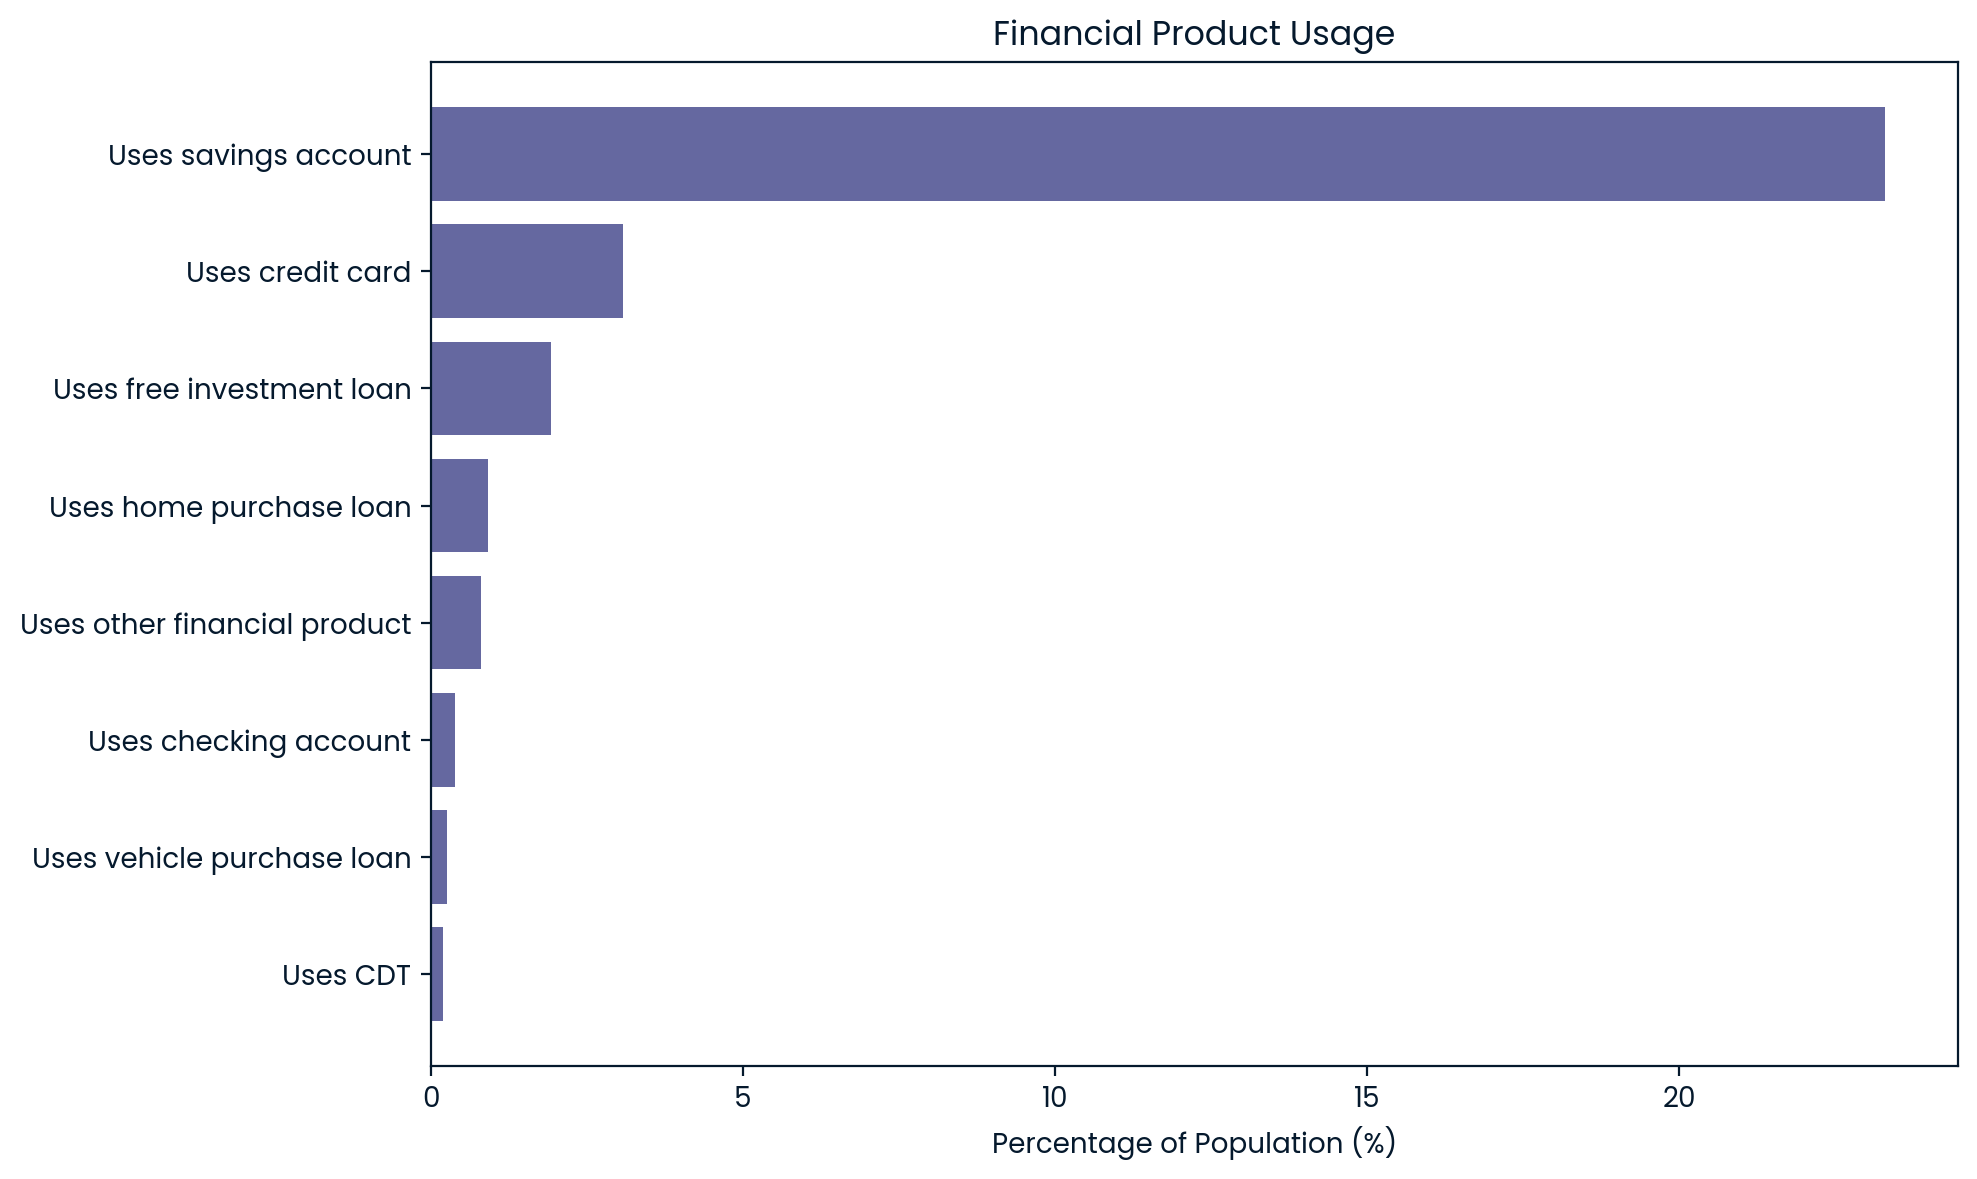

In [5]:
# Calculate usage %
product_usage = df[[col + '_bin' for col in financial_product_cols]].mean().sort_values() * 100
clean_labels = [col.replace('_bin', '') for col in product_usage.index]

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(clean_labels, product_usage.values)
plt.xlabel('Percentage of Population (%)')
plt.title('Financial Product Usage')
plt.tight_layout()
plt.show()


In [6]:
financial_product_usage_df = pd.DataFrame({
    'Financial Product': clean_labels,
    'Usage (%)': product_usage.round(2).values
}).sort_values(by='Usage (%)', ascending=False)

financial_product_usage_df


Financial Product  Usage (%)
7          Uses savings account      23.29
6              Uses credit card       3.08
5     Uses free investment loan       1.92
4       Uses home purchase loan       0.91
3  Uses other financial product       0.80
2         Uses checking account       0.38
1    Uses vehicle purchase loan       0.25
0                      Uses CDT       0.19

The most commonly used financial products are savings accounts and credit cards, indicating relatively broad access to basic banking services. In contrast, checking accounts and formal loans show significantly lower usage, suggesting potential barriers to credit access or lower demand for debt-based financial tools among the population.

## Financial Product Usage by Region 

Each subplot represents a region and displays the percentage of people using various financial products. This allows comparison across regions and identifies geographic disparities in financial inclusion.

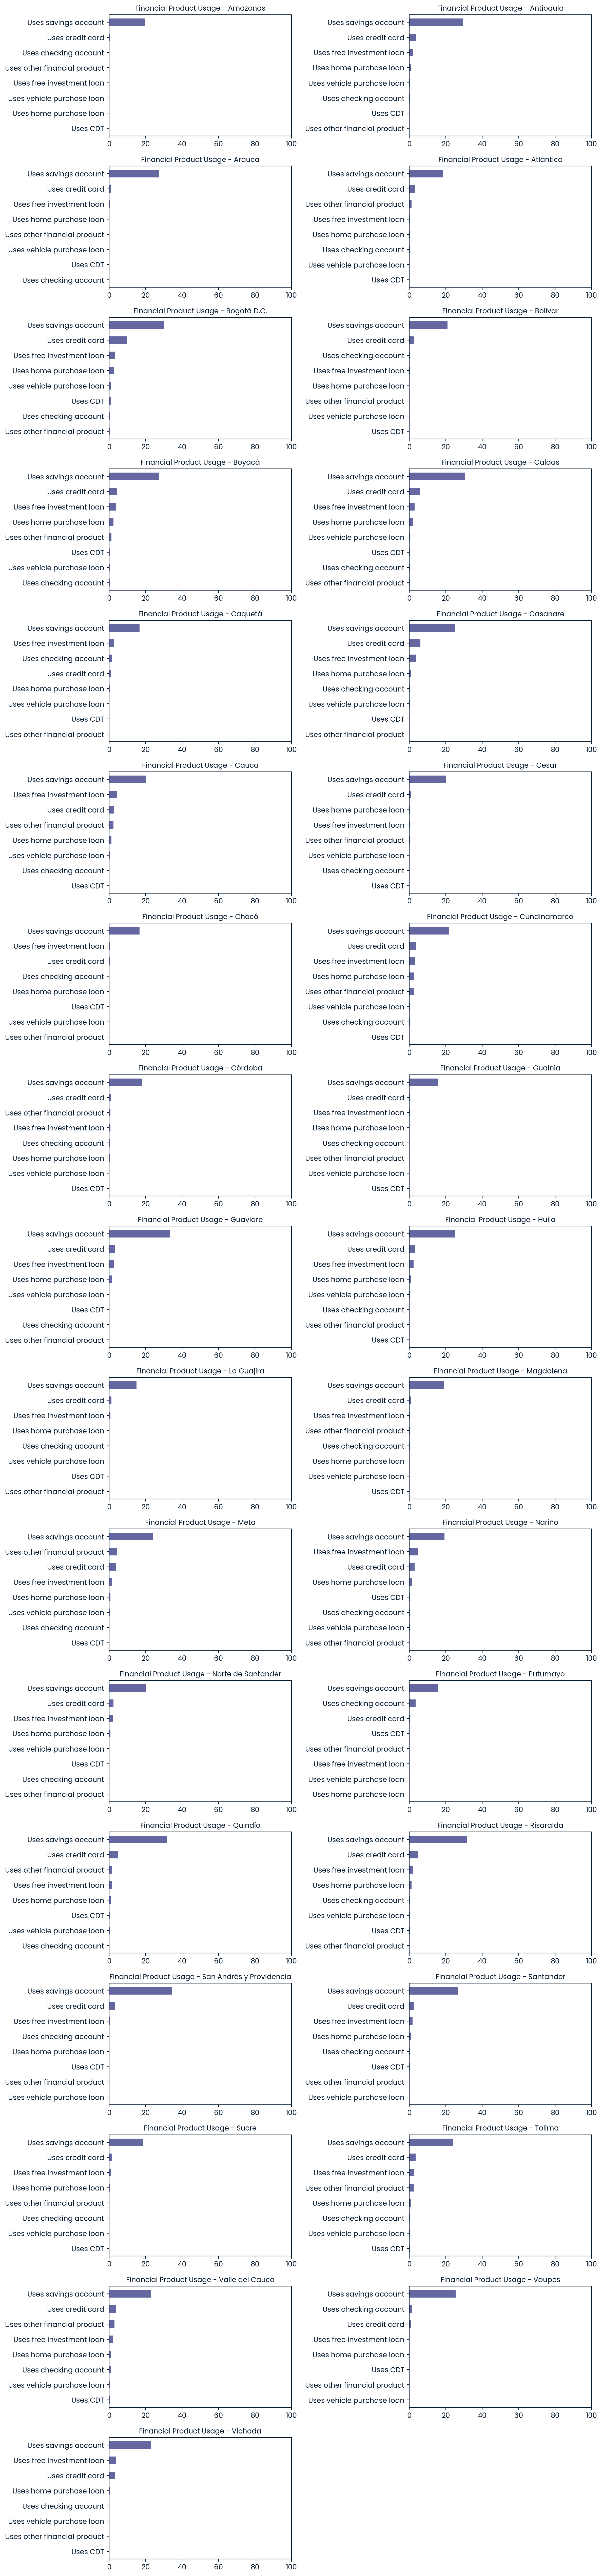

In [7]:
# Group by Region and calculate usage %
region_usage = df.groupby('Region')[[col + '_bin' for col in financial_product_cols]].mean() * 100
region_usage.columns = [col.replace('_bin', '') for col in region_usage.columns]

# Plot for each region
regions = region_usage.index.tolist()
cols, rows = 2, 17
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 3))
axes = axes.flatten()

for i, region in enumerate(regions):
    ax = axes[i]
    region_usage.loc[region].sort_values().plot(kind='barh', ax=ax)
    ax.set_title(f'Financial Product Usage - {region}', fontsize=10)
    ax.set_xlim(0, 100)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [8]:
# Create usage table: Regions x Financial Products (% usage)
region_product_usage_table = region_usage.round(2)
region_product_usage_table

Uses checking account  ...  Uses other financial product
Region                                           ...                              
Amazonas                                   0.07  ...                          0.00
Antioquia                                  0.24  ...                          0.02
Arauca                                     0.00  ...                          0.00
Atlántico                                  0.29  ...                          1.27
Bogotá D.C.                                0.62  ...                          0.31
Bolívar                                    0.49  ...                          0.09
Boyacá                                     0.28  ...                          1.23
Caldas                                     0.37  ...                          0.22
Caquetá                                    1.65  ...                          0.03
Casanare                                   0.62  ...                          0.00
Cauca                                      0.20  ...                          2.41
Cesar                                      0.07  ...                          0.31
Chocó                                      0.18  ...                          0.00
Cundinamarca                               0.25  ...                          2.50
Córdoba                                    0.39  ...                          0.71
Guainía                                    0.02  ...                          0.00
Guaviare                                   0.10  ...                          0.00
Huila                                      0.11  ...                          0.09
La Guajira                                 0.08  ...                          0.00
Magdalena                                  0.27  ...                          0.40
Meta                                       0.19  ...                          4.38
Nariño                                     0.43  ...                          0.11
Norte de Santander                         0.10  ...                          0.00
Putumayo                                   3.44  ...                          0.00
Quindío                                    0.16  ...                          1.59
Risaralda                                  0.45  ...                          0.02
San Andrés y Providencia                   0.15  ...                          0.00
Santander                                  0.41  ...                          0.17
Sucre                                      0.11  ...                          0.19
Tolima                                     0.60  ...                          2.59
Valle del Cauca                            0.81  ...                          2.87
Vaupés                                     1.39  ...                          0.00
Vichada                                    0.15  ...                          0.00

[33 rows x 8 columns]

There are clear regional disparities in financial product usage. Urban regions like Bogotá and Antioquia show higher uptake of savings accounts and credit products, reflecting better access to financial institutions. In contrast, rural and coastal regions (e.g., Chocó, La Guajira) exhibit lower usage rates across nearly all products, highlighting the need for improved financial infrastructure and inclusion in underserved areas.

## Financial Exclusion by Gender, Area Type, and Region

A tabular summary showing the financial exclusion rates by gender (Male/Female), area type (Urban/Rural), and overall per region. Helps identify demographic and spatial patterns of exclusion.

In [9]:
# Convert 'Uses none of the above' to binary 
df['is_financially_excluded'] = df['Uses none of the above'].apply(
    lambda val: 1 if isinstance(val, str) and val.strip().lower() == 'yes' else 0
)

# Pivot tables by Gender and CLASE (Urban/Rural)
exclusion_by_gender = pd.pivot_table(
    df,
    values='is_financially_excluded',
    index='Region',
    columns='Gender',
    aggfunc='mean'
) * 100

exclusion_by_clase = pd.pivot_table(
    df,
    values='is_financially_excluded',
    index='Region',
    columns='CLASE',
    aggfunc='mean'
) * 100

# Overall exclusion per region
exclusion_by_region = df.groupby('Region')['is_financially_excluded'].mean() * 100

# Combine all
exclusion_combined = exclusion_by_gender.join(exclusion_by_clase).join(exclusion_by_region)
exclusion_combined = exclusion_combined.rename(columns={1: 'Urban', 2: 'Rural', 'is_financially_excluded': 'Overall (%)'})
exclusion_combined = exclusion_combined.round(2)

# Display
exclusion_combined


Female   Male  Rural  Urban  Overall (%)
Region                                                            
Amazonas                   16.08  15.40    NaN  15.75        15.75
Antioquia                   6.37   7.98  18.63   5.49         7.12
Arauca                      5.74   5.32    NaN   5.55         5.55
Atlántico                   8.12  11.06  23.70   7.74         9.53
Bogotá D.C.                 5.41   6.17  16.44   5.49         5.76
Bolívar                     8.76   9.32  22.29   7.06         9.03
Boyacá                      8.90   9.64  21.85   6.73         9.24
Caldas                      6.47   9.10  24.17   5.20         7.70
Caquetá                    21.76  20.58  29.08  19.75        21.22
Casanare                    9.76  11.89    NaN  10.74        10.74
Cauca                      14.22  14.44  25.35  12.19        14.32
Cesar                      10.23  11.18  23.29   8.70        10.67
Chocó                      19.26  13.52  32.29  14.39        16.76
Cundinamarca               11.21  12.73  18.21   8.98        11.94
Córdoba                    10.30  11.15  21.35   8.54        10.70
Guainía                    11.96  18.08    NaN  14.97        14.97
Guaviare                    4.94   4.89    NaN   4.92         4.92
Huila                       8.34  10.74  19.35   7.65         9.47
La Guajira                 18.14  13.77  24.06  14.70        16.12
Magdalena                   9.81  11.13  22.77   8.42        10.44
Meta                        9.66  10.96  15.61   9.22        10.27
Nariño                     14.80  15.90  25.87  13.54        15.31
Norte de Santander         12.02  13.12  19.81  11.50        12.53
Putumayo                   27.17  21.79    NaN  24.75        24.75
Quindío                     6.33   8.41  16.40   6.14         7.30
Risaralda                   5.92   6.74   7.43   6.14         6.29
San Andrés y Providencia    2.41   4.65    NaN   3.48         3.48
Santander                   8.20   7.30   9.98   7.44         7.78
Sucre                      11.18  12.11  24.60   9.62        11.62
Tolima                     10.18  12.28  20.53   8.93        11.17
Valle del Cauca            11.44  12.38  20.76  10.71        11.87
Vaupés                      5.55   6.76    NaN   6.14         6.14
Vichada                    11.71   8.95    NaN  10.38        10.38

Financial exclusion is consistently higher in rural areas across all regions, with women facing greater exclusion rates than men. Departments like Putumayo and Caquetá stand out with the highest overall exclusion, particularly among women. This pattern underscores the intersectional challenges of gender and geography in accessing financial services.

## Visualizing Financial Exclusion by Gender and Settlement Type

Bar charts illustrating financial exclusion rates across regions, separated by gender (Male/Female) and area type (Urban/Rural). These visuals highlight how exclusion levels vary between demographic groups and geographic contexts, helping to pinpoint disparities.

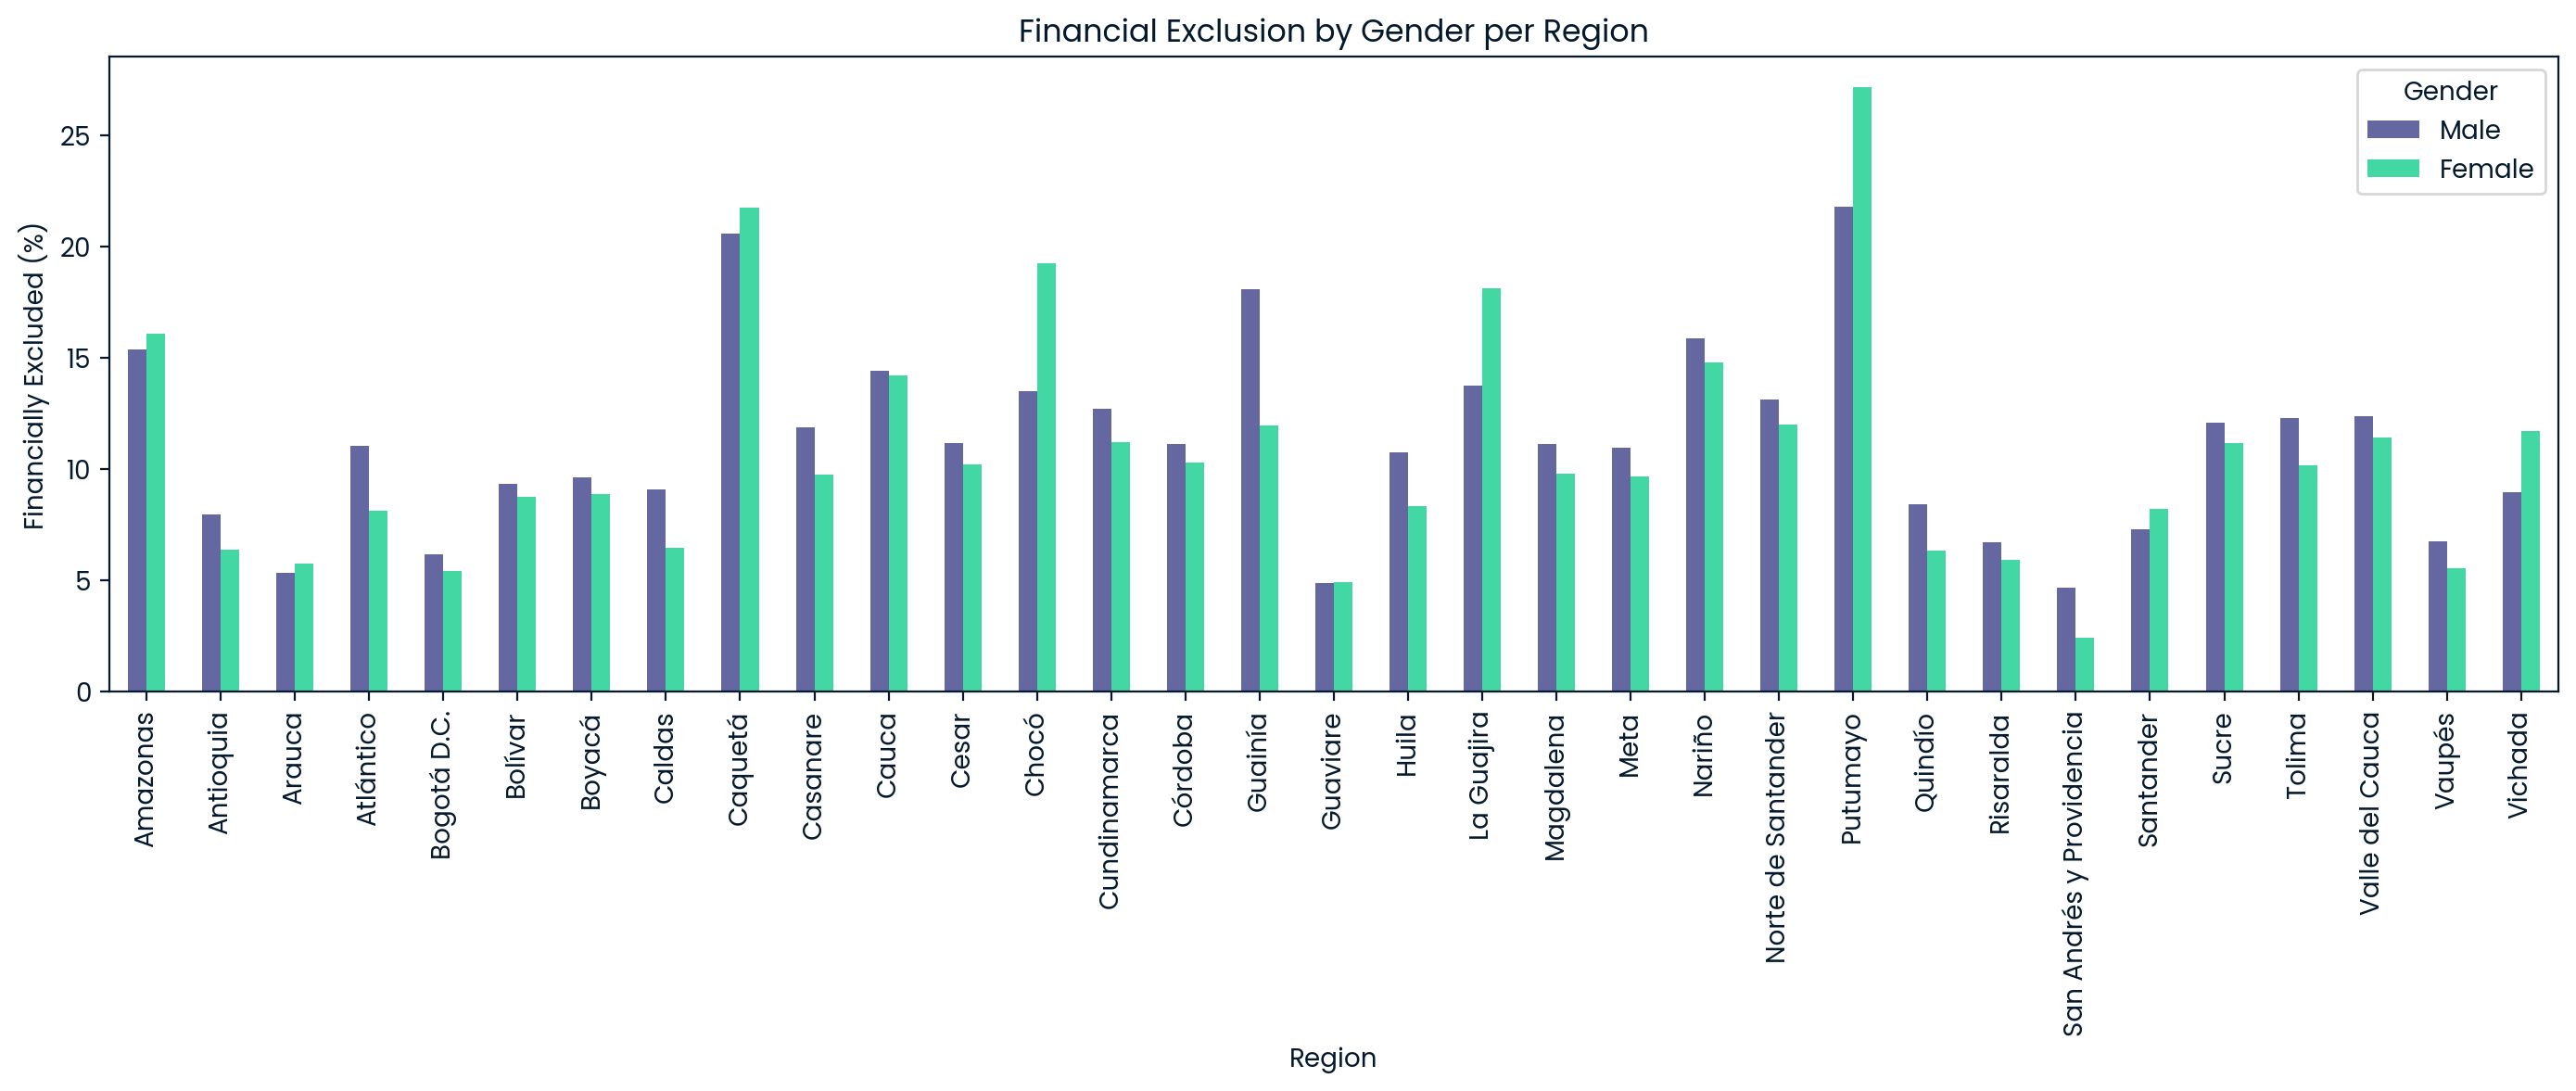

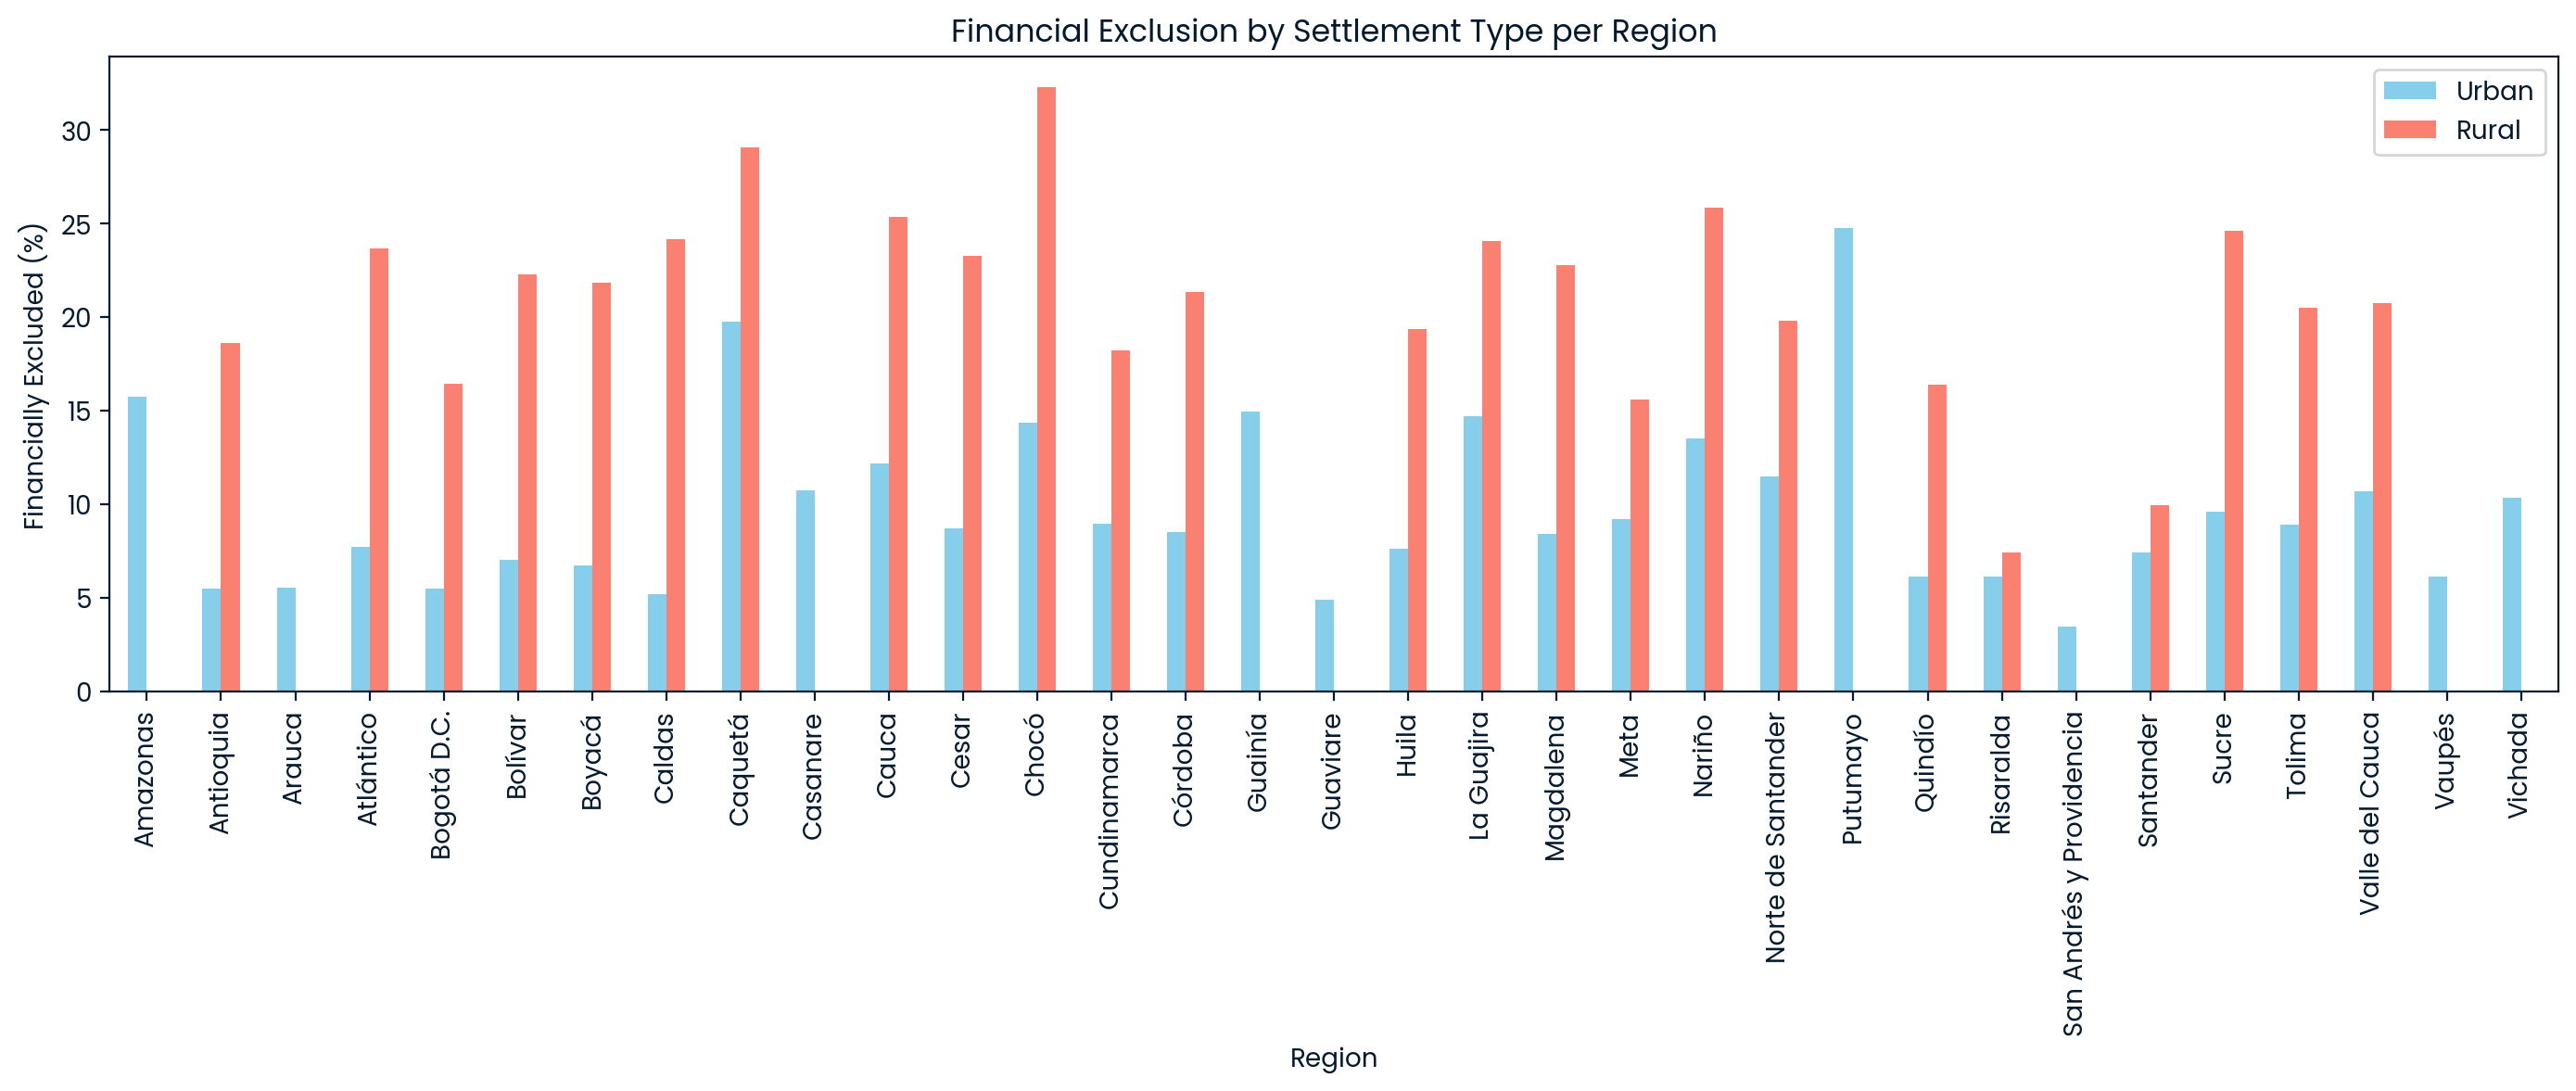

In [10]:
# Gender plot
exclusion_by_gender[['Male', 'Female']].plot(kind='bar', figsize=(14, 6))
plt.title('Financial Exclusion by Gender per Region')
plt.ylabel('Financially Excluded (%)')
plt.tight_layout()
plt.show()

# CLASE plot
exclusion_combined[['Urban', 'Rural']].fillna(0).plot(kind='bar', figsize=(14, 6), color=['skyblue', 'salmon'])
plt.title('Financial Exclusion by Settlement Type per Region')
plt.ylabel('Financially Excluded (%)')
plt.tight_layout()
plt.show()


The charts reveal that rural populations and women consistently face the highest levels of financial exclusion, especially in regions like Chocó, Putumayo, and Caquetá. Urban regions generally exhibit the lowest exclusion rates. These disparities emphasize the compounded effects of both gender and settlement type on financial access, pointing to a need for more inclusive regional policies.

## Distribution of Total Labor Income

A Kernel Density Estimate (KDE) plot showing the distribution of total labor income among individuals, excluding the top 1% to reduce the effect of extreme outliers. This helps reveal the underlying shape and spread of income levels across the population.

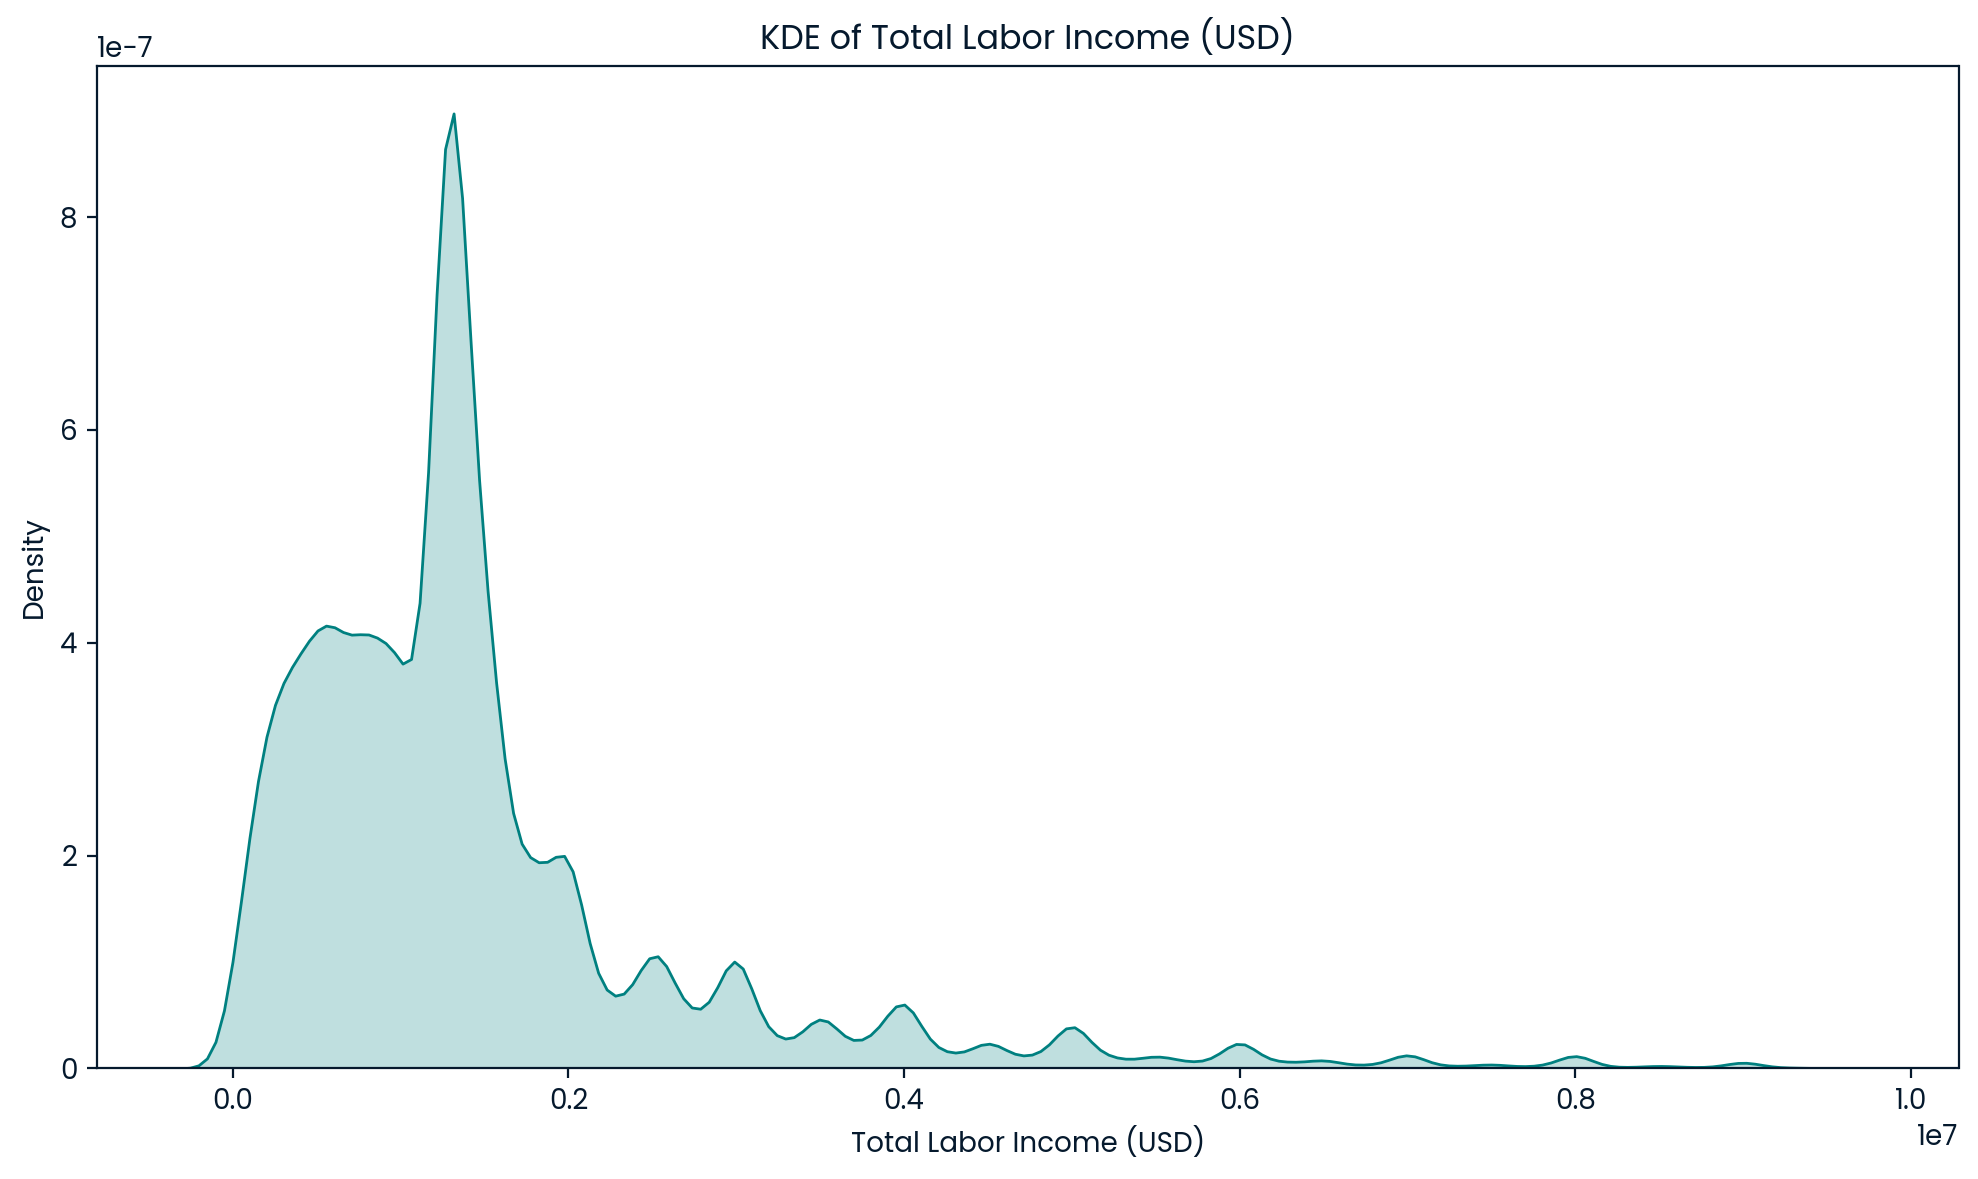

In [11]:
income_data = df['total_labor_income'].dropna()
income_data = income_data[income_data < income_data.quantile(0.99)]  # Remove top 1%

plt.figure(figsize=(10, 6))
sns.kdeplot(income_data, fill=True, color='teal')
plt.title('KDE of Total Labor Income (USD)')
plt.xlabel('Total Labor Income (USD)')
plt.tight_layout()
plt.show()


## Total Labor Income by Region and Gender

Boxplots illustrating the distribution of total labor income across regions, separated by gender. Outliers above the 95th percentile are excluded to improve readability. This visualization allows for comparison of income disparities between men and women within each region.

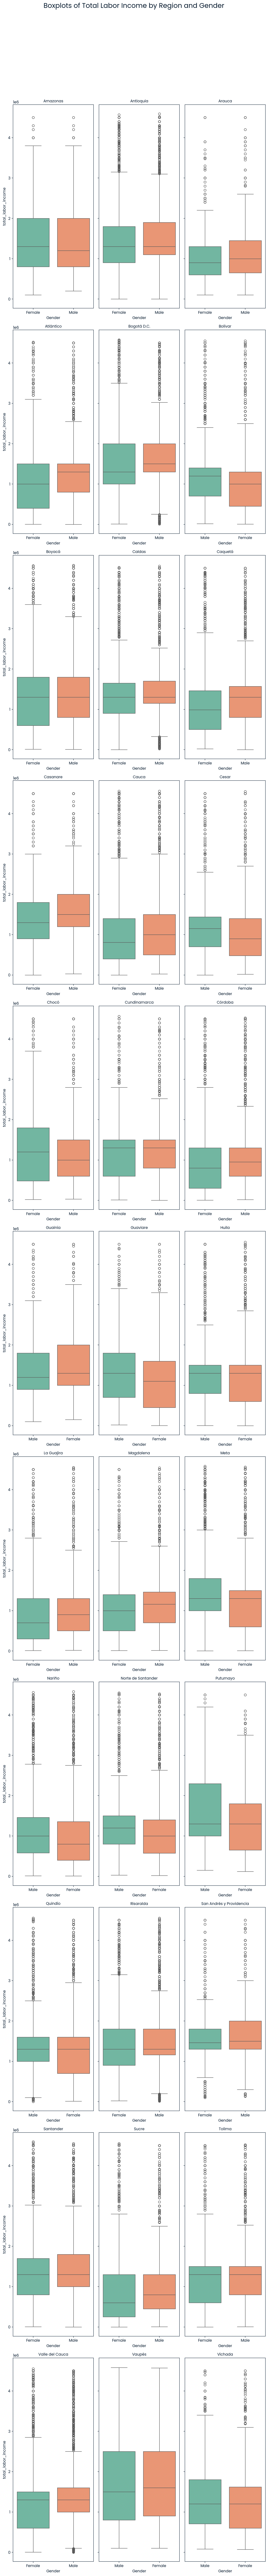

In [12]:
df_filtered = df[['Region', 'Gender', 'total_labor_income']].dropna()
df_filtered = df_filtered[df_filtered['total_labor_income'] > 0]
df_filtered = df_filtered[df_filtered['total_labor_income'] < df_filtered['total_labor_income'].quantile(0.95)]

regions = sorted(df_filtered['Region'].unique())
fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(10, 100), sharey=True)
axes = axes.flatten()

for i, region in enumerate(regions):
    sns.boxplot(data=df_filtered[df_filtered['Region'] == region], x='Gender', y='total_labor_income', ax=axes[i], palette='Set2')
    axes[i].set_title(region, fontsize=10)

for j in range(len(regions), len(axes)):
    axes[j].axis('off')

fig.suptitle('Boxplots of Total Labor Income by Region and Gender', fontsize=18)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Across nearly all regions, men have higher median labor incomes than women. Variability in income is also more pronounced for men in several regions. These patterns reflect persistent gender-based income inequality in the Colombian labor market.

## Unemployment Rates by Region

This section presents a summary table and horizontal bar chart of unemployment rates across Colombian regions. A binary flag was used to classify individuals as unemployed, allowing the calculation of regional unemployment percentages. The visual and tabular formats help identify regions with the highest levels of joblessness, supporting targeted policy or programmatic interventions.

In [13]:
# Create binary flag (1 = Unemployed, 0 = Not unemployed / NaN)
df_unemp = df[['Region', 'Unemployed']].copy()
df_unemp['is_unemployed'] = df_unemp['Unemployed'].apply(lambda x: 1 if x == 'Unemployed' else 0)

# Group by Region and calculate totals
unemp_summary = df_unemp.groupby('Region').agg(
    total_people=('is_unemployed', 'count'),   # includes both 0 and 1
    unemployed=('is_unemployed', 'sum')
)

# Calculate unemployment rate
unemp_summary['Unemployment Rate (%)'] = (
    unemp_summary['unemployed'] / unemp_summary['total_people']
) * 100
unemp_summary['Unemployment Rate (%)'] = unemp_summary['Unemployment Rate (%)'].round(2)

# Sort and display
unemp_summary = unemp_summary.sort_values(by='Unemployment Rate (%)', ascending=False).reset_index()

# Display table
unemp_summary


Region  total_people  unemployed  Unemployment Rate (%)
0                     Arauca          4939         795                  16.10
1                   Putumayo          3956         500                  12.64
2                      Chocó         31346        2980                   9.51
3                    Vichada          3332         291                   8.73
4   San Andrés y Providencia          8488         712                   8.39
5                   Guaviare          4169         304                   7.29
6                 La Guajira         30273        2043                   6.75
7                    Caquetá         28634        1881                   6.57
8            Valle del Cauca         43242        2774                   6.42
9                     Nariño         36301        2316                   6.38
10                     Cauca         28936        1752                   6.05
11                   Córdoba         27697        1666                   6.02
12               Bogotá D.C.         27010        1604                   5.94
13        Norte de Santander         33475        1968                   5.88
14                  Casanare          5138         292                   5.68
15                    Tolima         26390        1493                   5.66
16              Cundinamarca         16135         909                   5.63
17                     Sucre         32070        1800                   5.61
18                 Santander         39794        2232                   5.61
19                   Bolívar         36312        1986                   5.47
20                   Quindío         30388        1660                   5.46
21                 Risaralda         37524        1944                   5.18
22                    Boyacá         27645        1415                   5.12
23                    Caldas         38067        1862                   4.89
24                     Cesar         30333        1481                   4.88
25                      Meta         33164        1594                   4.81
26                 Antioquia         48114        2263                   4.70
27                 Atlántico         36173        1687                   4.66
28                     Huila         30243        1299                   4.30
29                 Magdalena         35644        1500                   4.21
30                    Vaupés          5263         178                   3.38
31                   Guainía          5025         143                   2.85
32                  Amazonas          4463          71                   1.59

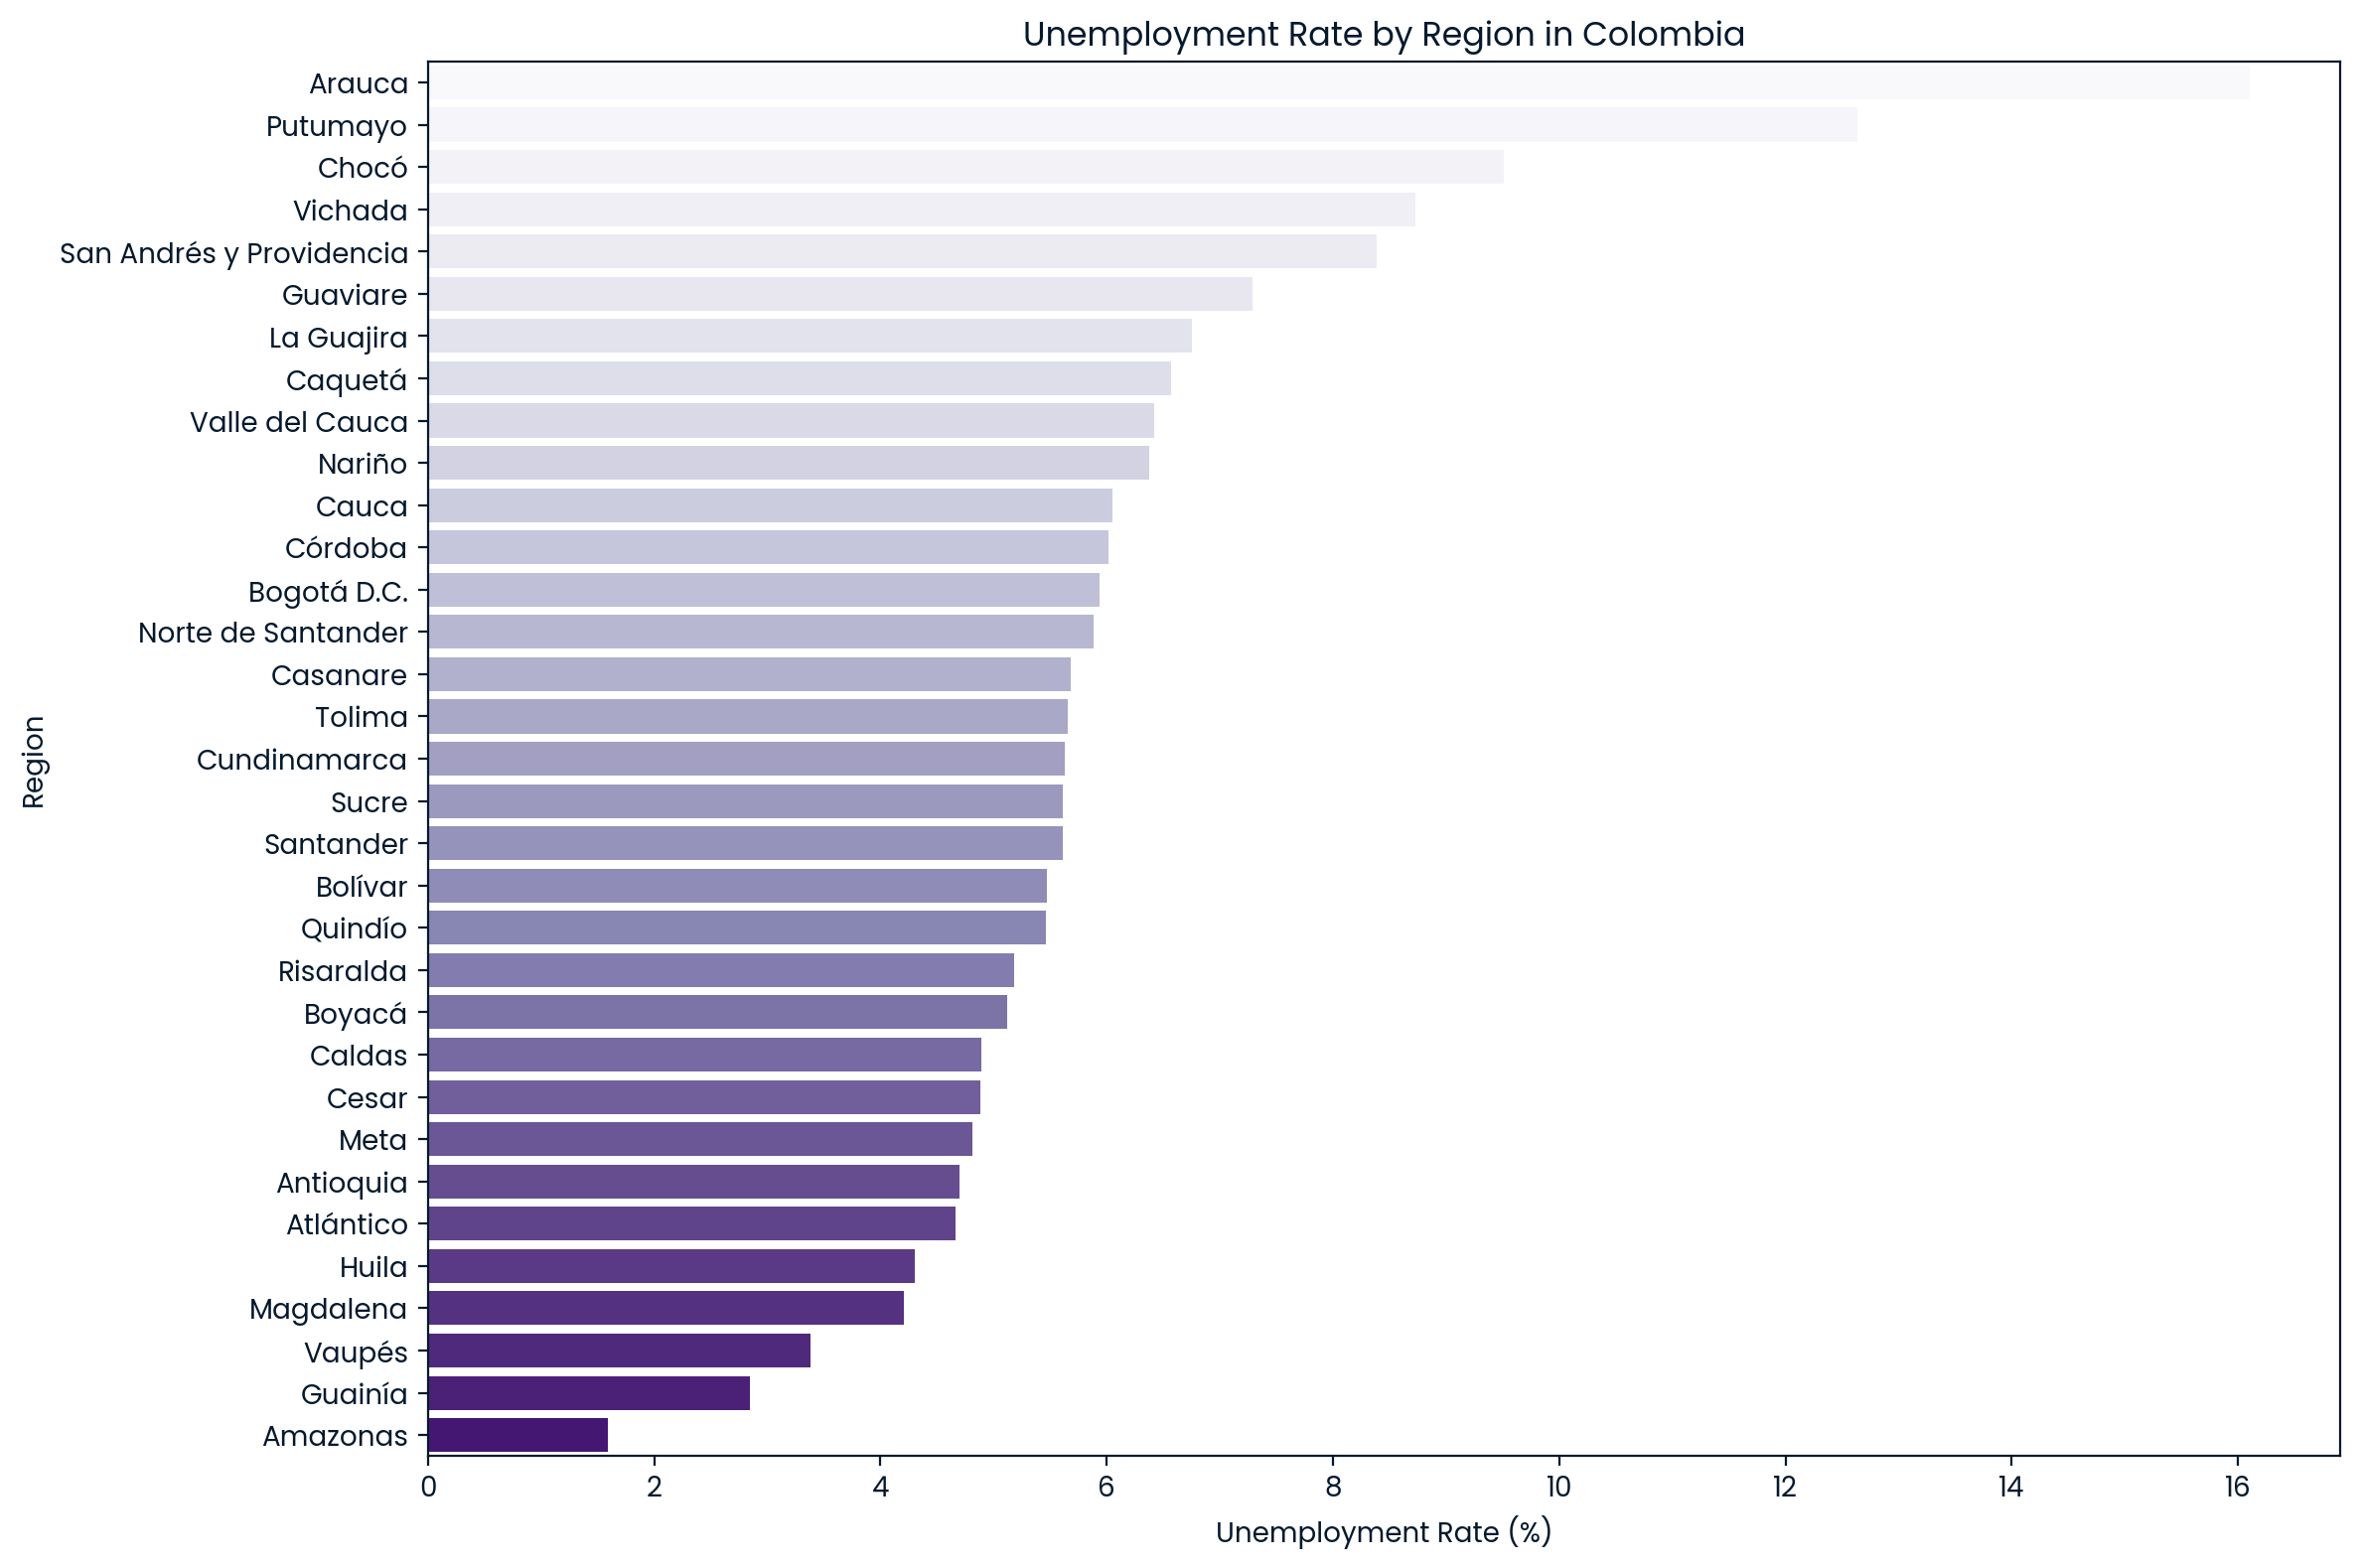

In [14]:
# Create a binary flag for unemployment
df['is_unemployed'] = df['Unemployed'].apply(lambda x: 1 if x == 'Unemployed' else 0)

# Group by Region to compute unemployment summary
unemp_summary = df.groupby('Region').agg(
    total_people=('is_unemployed', 'count'),
    unemployed=('is_unemployed', 'sum')
)

# Calculate unemployment rate
unemp_summary['Unemployment Rate (%)'] = (unemp_summary['unemployed'] / unemp_summary['total_people']) * 100
unemp_summary = unemp_summary.round(2).sort_values(by='Unemployment Rate (%)', ascending=False).reset_index()

# Plot 
plt.figure(figsize=(12, 8))
sns.barplot(data=unemp_summary, x='Unemployment Rate (%)', y='Region', palette='Purples', alpha= 1)
plt.title('Unemployment Rate by Region in Colombia')
plt.tight_layout()
plt.show()


Regions such as Arauca, Putumaya, and Chocó exhibit the highest unemployment rates, highlighting persistent labor market challenges in historically underserved areas. Conversely, urban regions show relatively lower unemployment, likely due to more diversified economies and greater access to formal job markets. These regional disparities emphasize the need for localized employment strategies and inclusive economic development.


## Employment Characteristics Among the Economically Active Population

Pie charts showing the distribution of contract types and employment types among individuals who reported having a job or business. This visualization offers insights into the nature of employment in Colombia, including prevalence of formal vs. informal arrangements and the diversity of work structures.

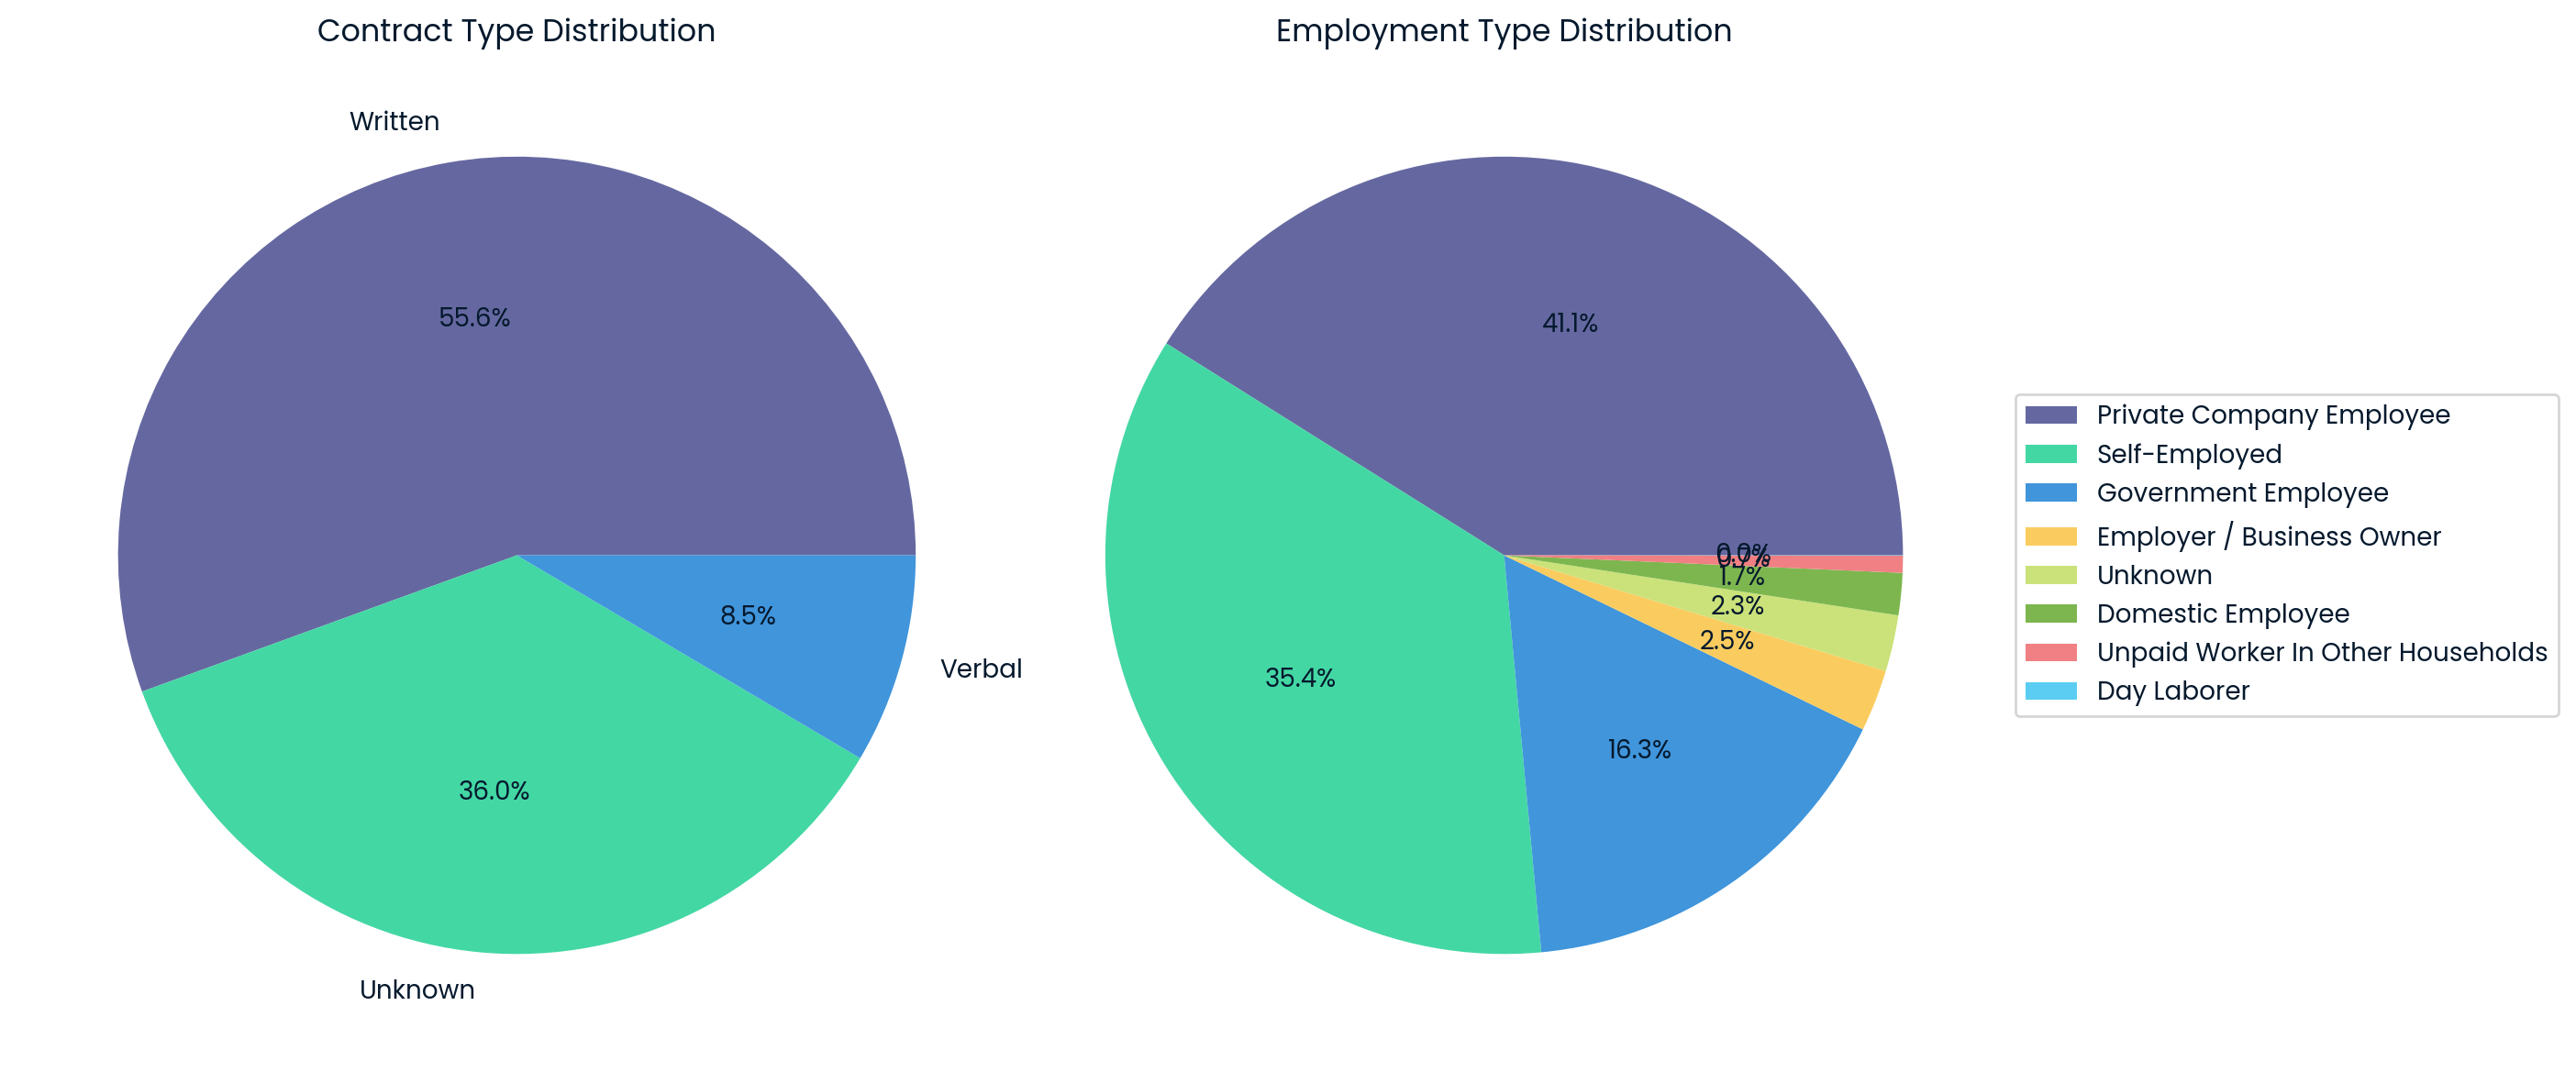

In [15]:
# Filter to include only individuals who reported having a job or business, and clean relevant columns
df_filtered = df[df['had_job_or_business'].astype(str).str.lower().str.strip() == 'yes']
df_filtered['contract_type'] = df_filtered['contract_type'].fillna('Unknown').astype(str).str.title()
df_filtered['employment_type'] = df_filtered['employment_type'].fillna('Unknown').astype(str).str.title()

# Create a figure with two side-by-side pie charts for contract type and employment type
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].pie(df_filtered['contract_type'].value_counts(), labels=df_filtered['contract_type'].value_counts().index, autopct='%1.1f%%')
axes[0].set_title('Contract Type Distribution')

# Plot employment type pie chart with legend instead of labels directly on the chart
wedges, _, _ = axes[1].pie(df_filtered['employment_type'].value_counts(), labels=None, autopct='%1.1f%%')
axes[1].legend(wedges, df_filtered['employment_type'].value_counts().index, loc="center left", bbox_to_anchor=(1, 0.5))
axes[1].set_title('Employment Type Distribution')

# Display
plt.tight_layout()
plt.show()


A significant portion of the economically active population is engaged in informal work arrangements, including self-employment and contracts without legal benefits. This reflects structural labor market informality. The significant presence of non-formal contracts suggests the need for labor regulation reforms and expanded access to formal employment opportunities.

## Income and Expense Patterns in the Colombian Population

This section provides a comprehensive view of how individuals in Colombia earn and spend money, based on different income and expense categories.

- The first chart displays the percentage of the population that receives income from various sources, including labor, government programs, pensions, and transfers from households.

- The second chart shows the average amount received per person in each income category, giving insight into which sources contribute most to individual finances.

- The third chart presents the percentage of people making payments in categories such as housing, health, and taxes, reflecting the spread of financial obligations across the population.

- The final chart illustrates the average payment amount per person by expense category, helping to understand the relative financial burden of different types of expenses.

These visuals together highlight patterns of income generation and expenditure, offering valuable context for assessing financial inclusion and economic well-being.



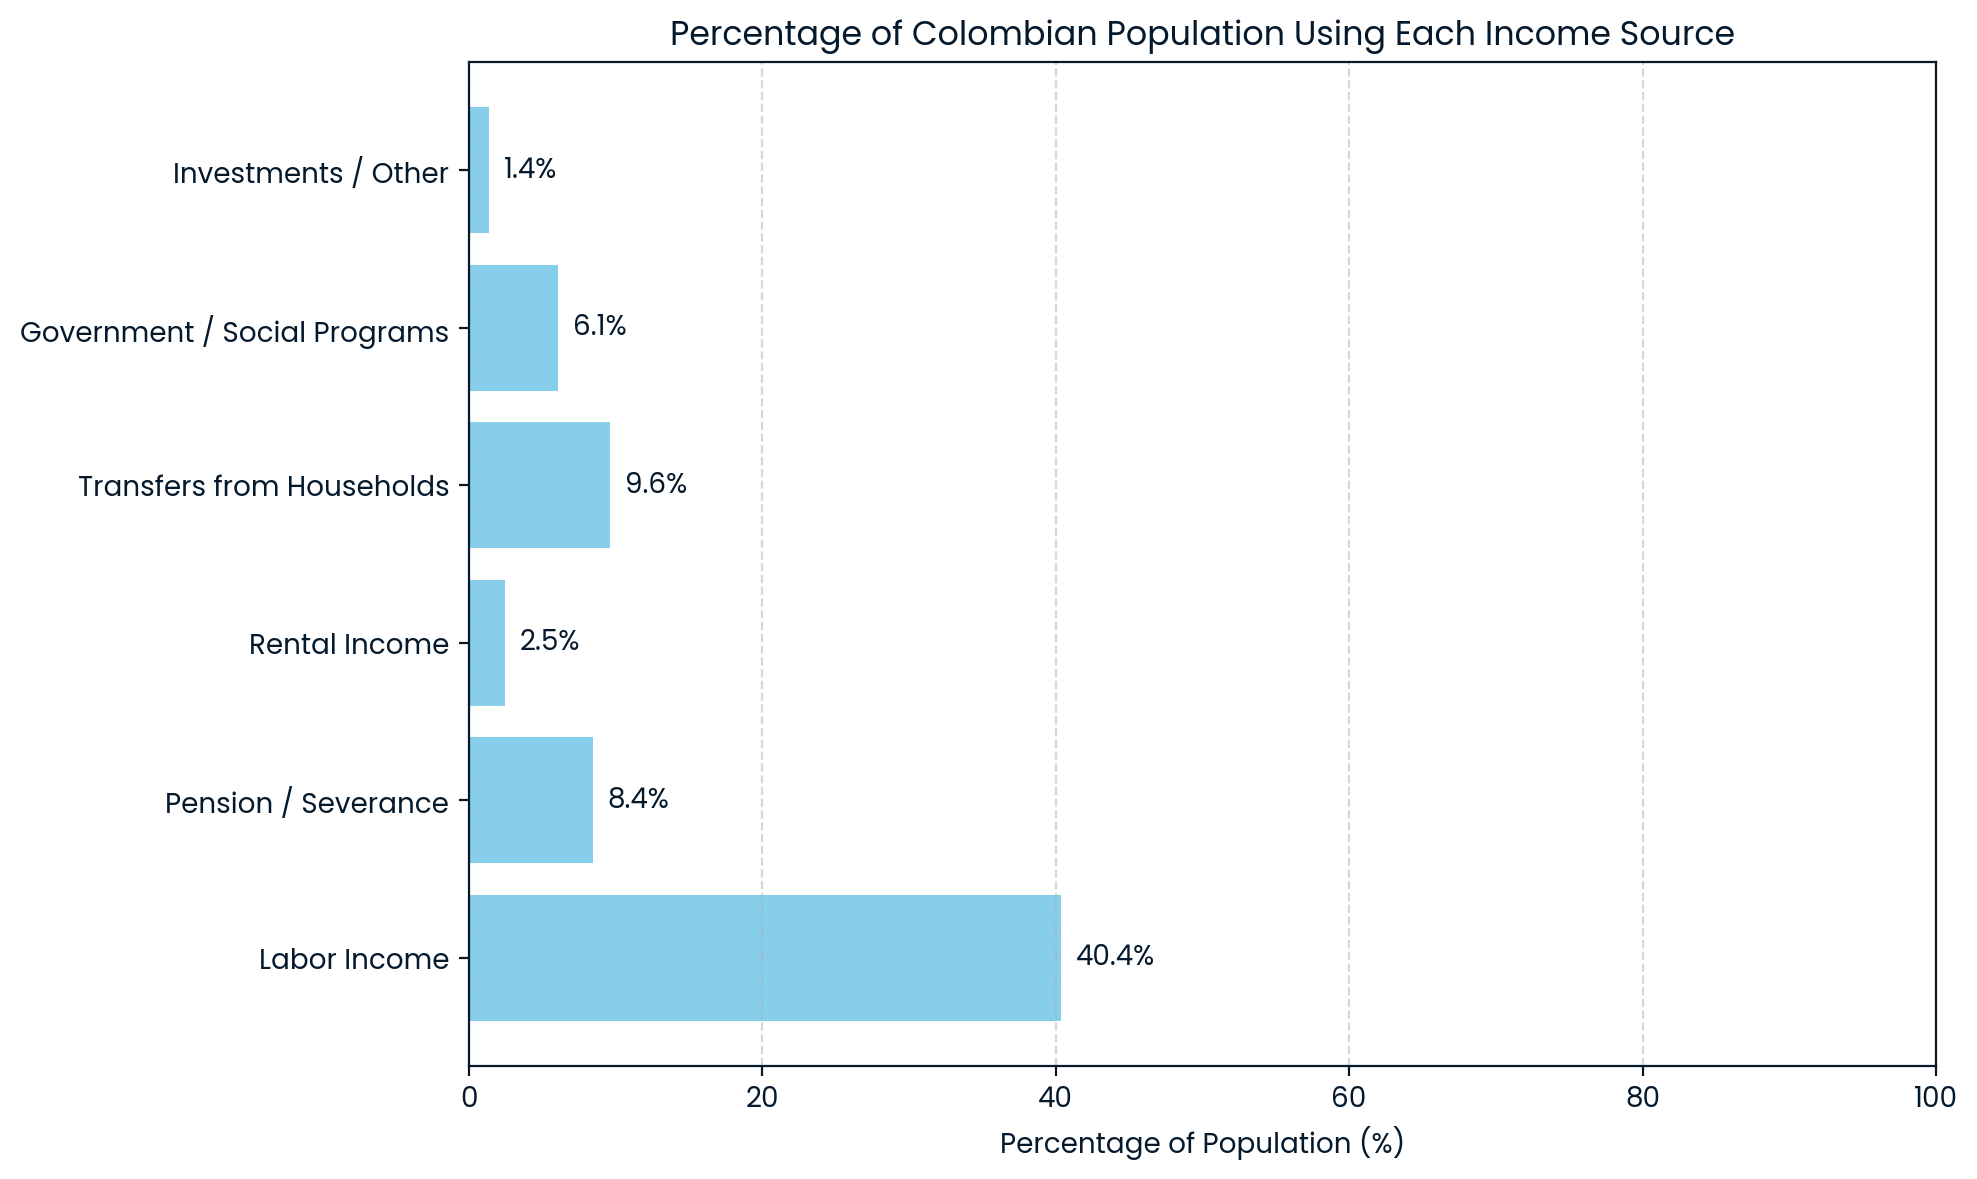

In [20]:
# Define income sources and relevant USD columns
income_sources = {
    'Labor Income': [
        'main_job_gross_income_USD', 'secondary_job_income_USD',
        'total_labor_income_USD', 'Earned income last month_USD'
    ],
    'Pension / Severance': [
        'Amount received from pensions or retirement (last month)_USD',
        'Amount received from severance pay or interest (last 12 months)_USD'
    ],
    'Rental Income': [
        'Amount received for rentals (last month)_USD'
    ],
    'Transfers from Households': [
        'Amount received from households in country (last 12 months)_USD',
        'Amount received from households abroad (last 12 months)_USD'
    ],
    'Government / Social Programs': [
        'Amount from government entities (last 12 months)_USD',
        'Amount from More Families in Action (last 12 months)_USD',
        'Amount from Youth in Action (last 12 months)_USD',
        'Amount from Colombia Mayor (last 12 months)_USD',
        'Amount from other programs (last 12 months)_USD'
    ],
    'Investments / Other': [
        'Amount received from investments (last 12 months)_USD',
        'Amount received from other sources (last 12 months)_USD'
    ]
}

# Calculate percentage of people using each source
reach_percentages = {}
total_people = len(df)

for source, cols in income_sources.items():
    received = df[cols].gt(0).any(axis=1)
    reach_percentages[source] = (received.sum() / total_people) * 100

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(list(reach_percentages.keys()), list(reach_percentages.values()), color='skyblue')

# Add labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', va='center')

plt.xlabel('Percentage of Population (%)')
plt.title('Percentage of Colombian Population Using Each Income Source')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


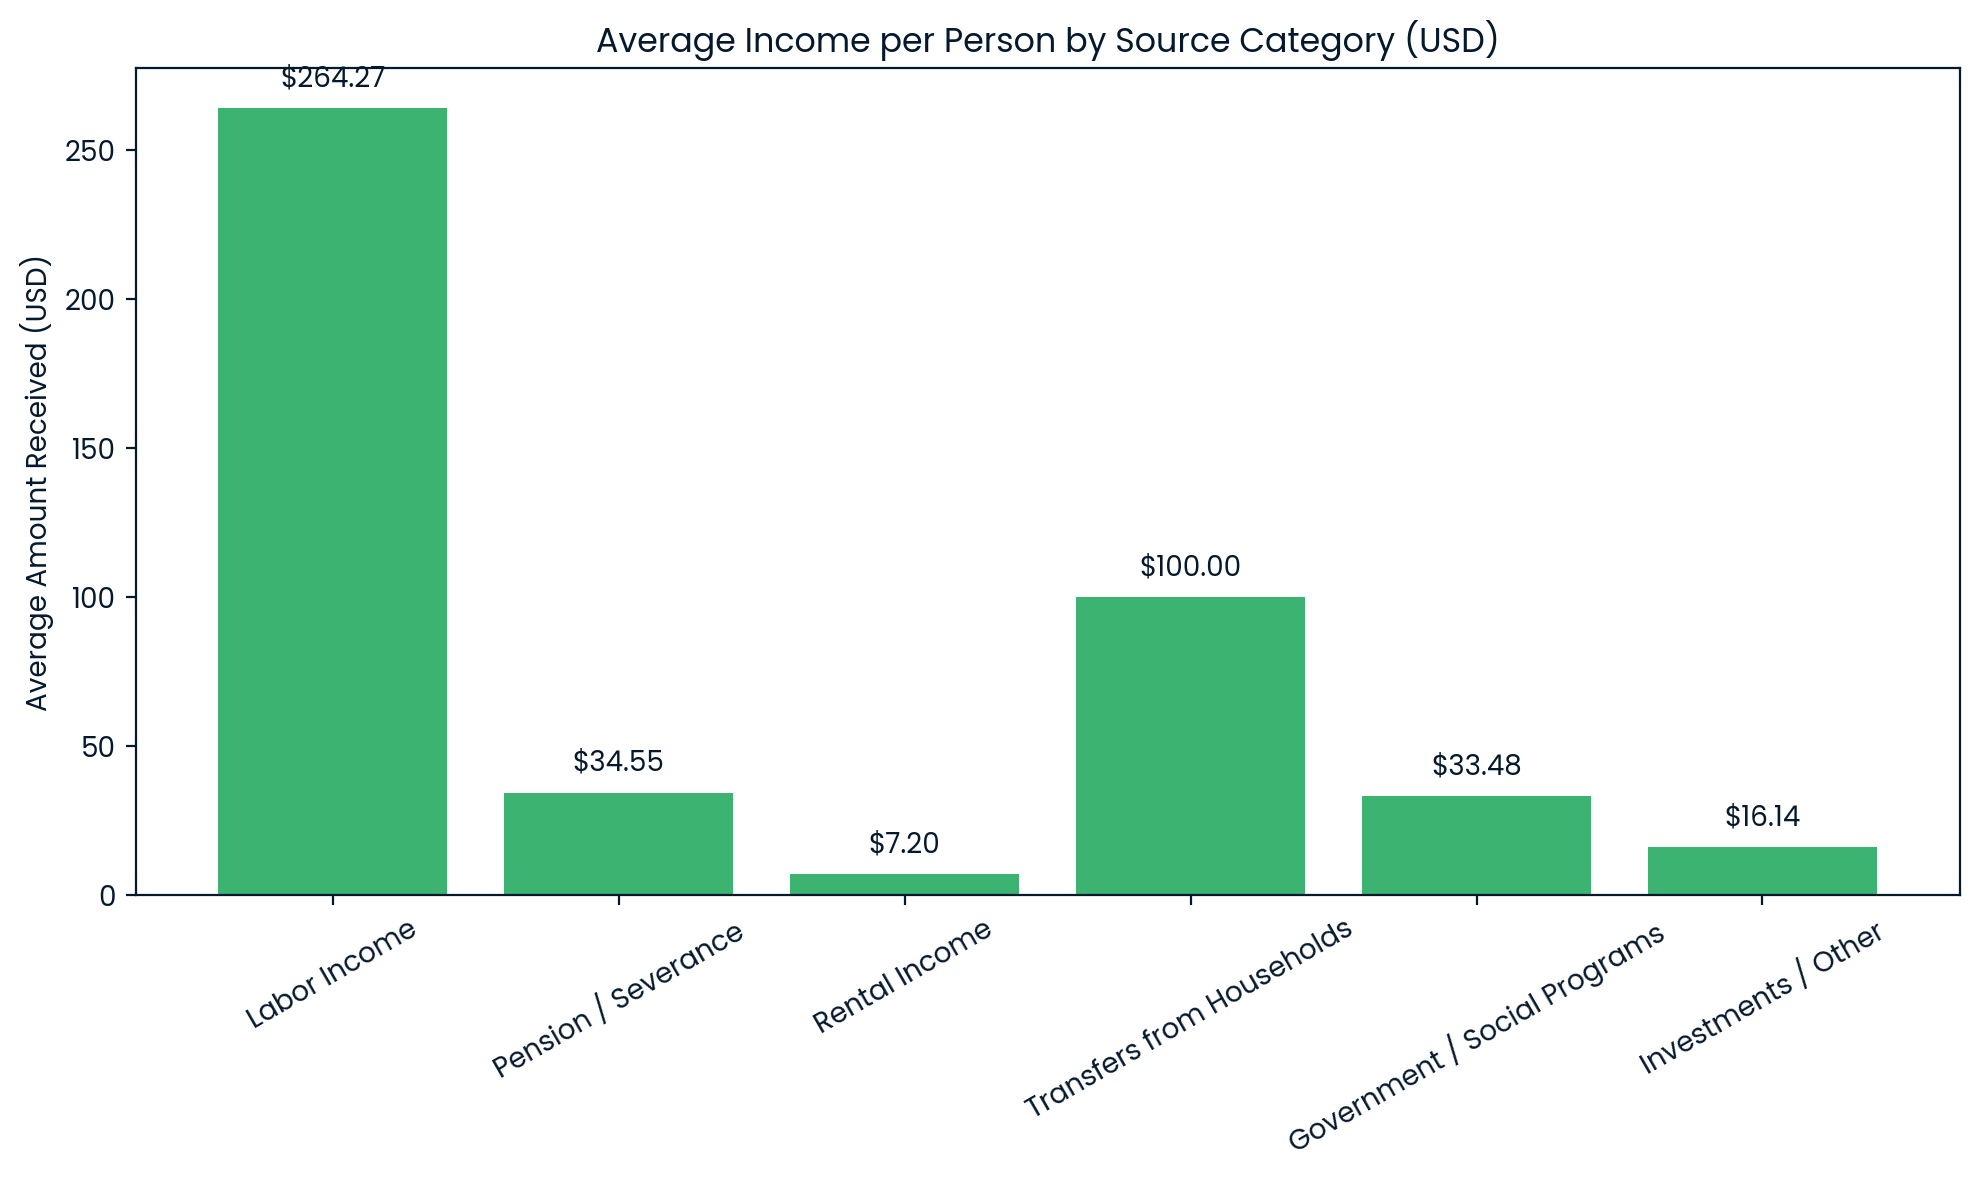

In [21]:
# Define income categories
income_categories = income_sources  

# Calculate average income per category
category_avg = {
    category: df[cols].sum(axis=1, skipna=True).mean()
    for category, cols in income_categories.items()
}

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(category_avg.keys(), category_avg.values(), color='mediumseagreen')

# Add labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f"${height:,.2f}", ha='center', va='bottom')

plt.ylabel('Average Amount Received (USD)')
plt.title('Average Income per Person by Source Category (USD)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


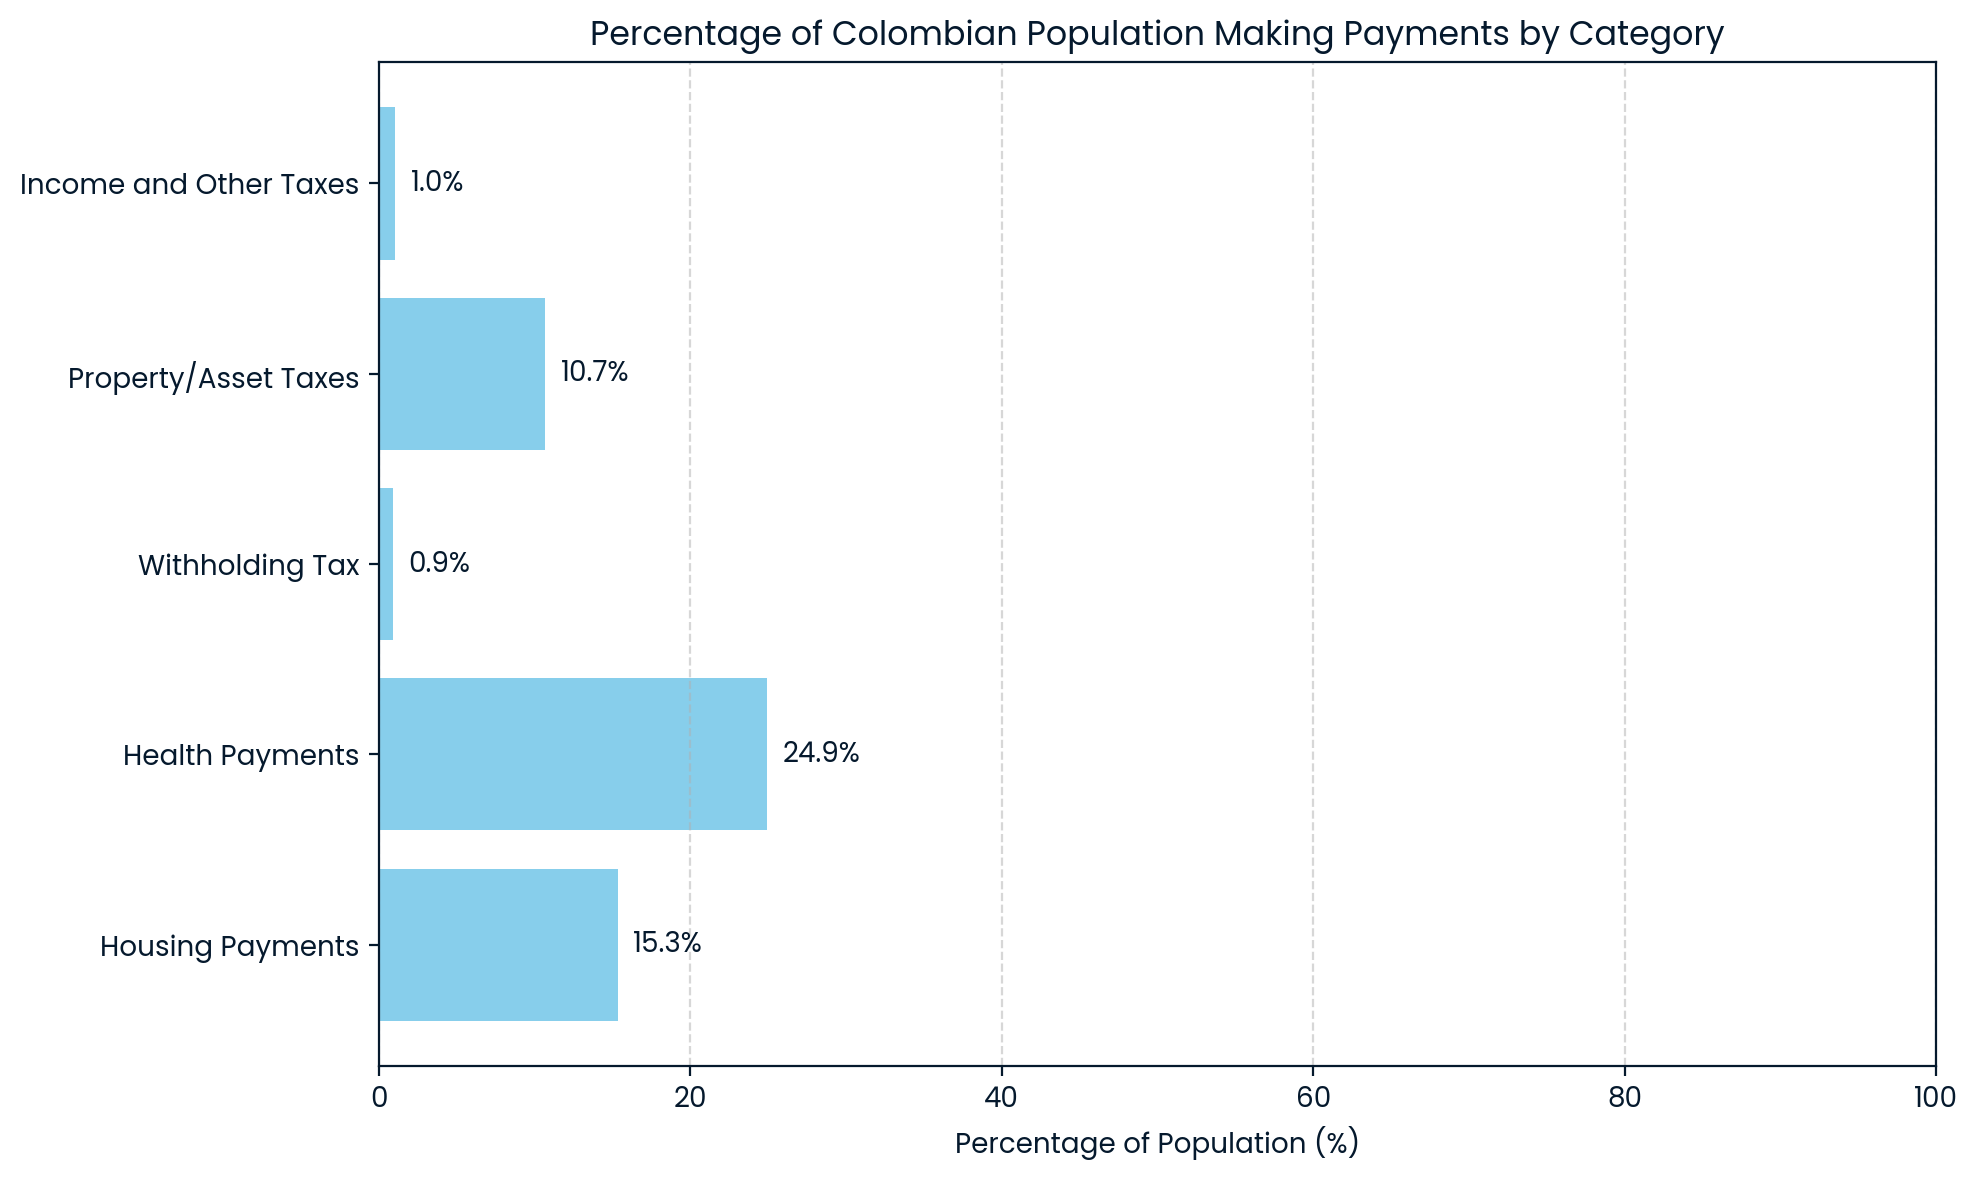

In [22]:
# Define expense categories
expense_categories = {
    'Housing Payments': [
        'Monthly amortization fee_USD', 'Actual monthly rent payment_USD'
    ],
    'Health Payments': [
        'Monthly health payment (COP)_USD'
    ],
    'Withholding Tax': [
        'withholding_tax_amount_USD'
    ],
    'Property/Asset Taxes': [
        'Amount paid in property tax (last 12 months)_USD',
        'Amount paid in capital gains tax (last 12 months)_USD',
        'Amount paid in vehicle tax (last 12 months)_USD'
    ],
    'Income and Other Taxes': [
        'Amount paid in income and supplementary tax (last 12 months)_USD',
        'Amount paid in taxes on winnings or asset sales (last 12 months)_USD'
    ]
}

# Calculate percentage making payments
payment_percentages = {}
for category, cols in expense_categories.items():
    paid = df[cols].gt(0).any(axis=1)
    payment_percentages[category] = (paid.sum() / total_people) * 100

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(list(payment_percentages.keys()), list(payment_percentages.values()), color='skyblue')

# Add labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', va='center')

plt.xlabel('Percentage of Population (%)')
plt.title('Percentage of Colombian Population Making Payments by Category')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


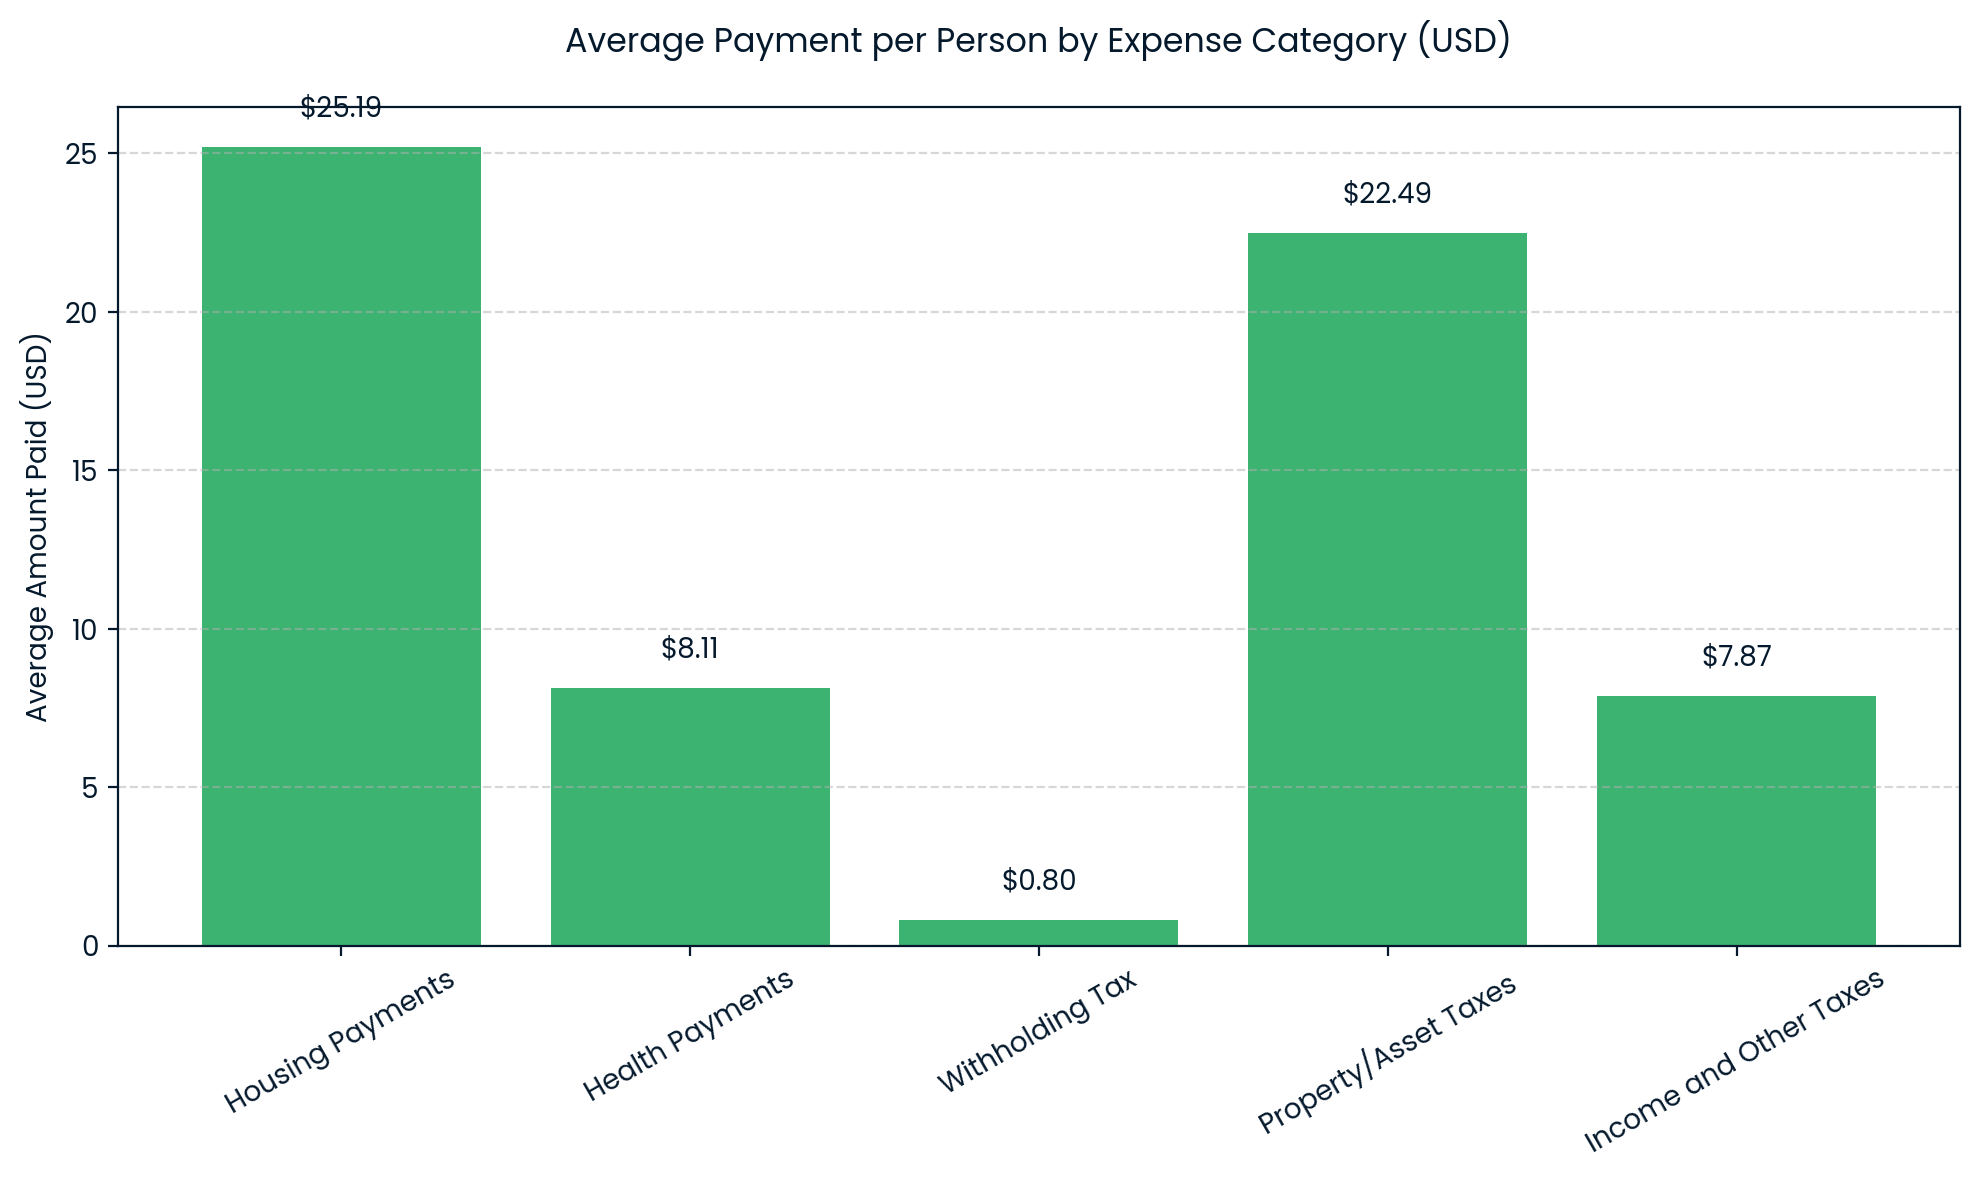

In [23]:
# Calculate average payment amount
expense_avg = {
    category: df[cols].sum(axis=1, skipna=True).mean()
    for category, cols in expense_categories.items()
}

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(expense_avg.keys(), expense_avg.values(), color='mediumseagreen')
plt.ylabel('Average Amount Paid (USD)')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + (0.03 * max(expense_avg.values())),
        f"${height:,.2f}",
        ha='center',
        va='bottom'
    )

plt.title('Average Payment per Person by Expense Category (USD)', pad=20)
plt.tight_layout()
plt.show()


Labor income is the most common and highest-contributing source of revenue, yet a sizable portion of the population also relies on government transfers and family support. On the expense side, housing and health are the most widespread and financially significant categories. Together, the charts underscore the importance of income diversification and the need for policies that ease the cost of essential services.


## Conclusion

This analysis gives a clear picture of how people in Colombia earn, spend, and access financial services. It shows that there are still big gaps in financial inclusion, job quality, and income levels among different groups. Factors like region, gender, and job type play a big role in shaping these outcomes. The results suggest that more inclusive policies are needed to create fairer access to jobs and financial tools for everyone.
